#*Assessing Bahrain  as a Foreign Investment Destination*




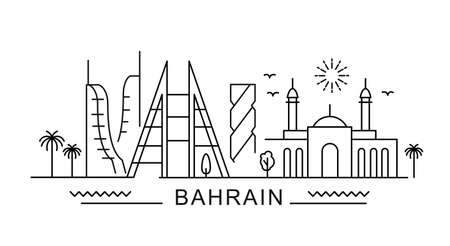

######**Author:** *Hasan Abdulrazaq*
######**Date:** *September 2023*  


---



**Warning:** You have to download the following image and upload it into the notebook, so the wordcloud would work. [image](https://drive.google.com/file/d/1gBRC_VeyMWksdUGGTToRSj2Wx4FNrkRL/view?usp=share_link)

## **Project Overview**  

Foreign investment plays a pivotal role in the global economy, fostering economic growth, job creation, and international collaboration. The Kingdom of Bahrain, situated in the heart of the Arabian Gulf, has been actively promoting itself as an attractive destination for foreign investors. This data analysis project aims to evaluate Bahrain's suitability as a foreign investment destination by examining various economic, financial, and socio-political factors.

**Terminologies:**

**FDI:** Foreign Direct Investment.  

**EDB:** Bahrain Economic Developement Board.     

> Table of Content:
- EDA for investment Influncers (Opportunities, Risks, People):  
  - Importing datasets.
  - Cleaning.
  - Analyzing and visualizing.
- EDB marketing Strategy:  
  - EDB website scraper.
  - Words Frequency Analysis.
  - Analyzing and visualizing.
- Predicting net inward FDI:  
  - Importing dataset & libraries.
  - Cleaning.
  - Predicting.

#Foreign Investment EDA  


---



I am cleaning, analyzing and visualizing the following datasets:

- Inward FDI By Country
- Inward FDI By Industry.
- Business confidence Index.
- GDP's.
- FDI % of GDP for multiple countries.
- Crime Index.
- Industry % of GDP.
- Population (Bahrain vs. Non-Bahraini).
- Education levels.

### Importing Libraries & data

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
#importing FDI by country & FDI by industry datasets
#FDI By country
df = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/DataSets/main/FDI_by_country.csv')
#FDI by industry
df2 = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/DataSets/main/FDI_by_industry.csv')
#Business confidence Index
bci = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/DataSets/main/BCI_bahrain.csv')
#GDP's
gdp = pd.read_csv("https://raw.githubusercontent.com/HasanAbdulrazaq/Capstone/main/gdp's.csv")
#fdi % GDP
fdi_gdp_prc = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/Capstone/main/fdi_gdp.csv')
#Crime index
crime = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/DataSets/main/crime_index.csv')
#Industry % GDP
gdp_ind = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/DataSets/main/gdp_contributions_industries_bh.csv')
#population
population = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/Capstone/main/population.csv')
#Education levels
education = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/Capstone/main/education.csv')

###Data Cleaning

In [237]:
#renaming column name for gdp_ind & education for easier drop
gdp_ind.columns = ['year', 'quarter', 'sector', 'arabic_sector', 'activity', 'arabic_activity', 'percentage']
education.columns = ['age_group', 'arabic1','education_level', 'arabic2', 'nationality', 'arabic3', 'sex', 'arabic4', 'population']

In [238]:
#Dropping arabic columns
df.drop(['المنطقة الجغرافية', 'المجموعة الجغرافية', 'البلد'], axis = 1, inplace=True)
df2.drop('النشاط ISIC', axis=1, inplace=True)
gdp_ind.drop(['arabic_sector', 'arabic_activity'], axis=1, inplace=True)
education.drop(['arabic1', 'arabic2', 'arabic3', 'arabic4'], axis=1, inplace=True)

In [239]:
#renaming columns
df.columns = ['year', 'country', 'region', 'geo_group', 'amount']
df2.columns = ['year', 'industry', 'amount']
bci.columns = ['year', 'quarter', 'bci']
population.columns = ['year', 'nationality', 'arabic1', 'sex', 'arabic2', 'population']

In [240]:
#checking for duplicates
print(df.duplicated().sum())
df2.duplicated().sum()

0


0

In [241]:
#checking for nulls
print(df.isnull().sum())
print(df2.isnull().sum())

year          0
country       0
region        0
geo_group     0
amount       14
dtype: int64
year        0
industry    0
amount      0
dtype: int64


In [242]:
#dropping nulls from df
df.dropna(inplace=True)
gdp.dropna(inplace=True)
fdi_gdp_prc.dropna(inplace=True)

In [243]:
#changing the names of the industries in df2

names = {
    'Administrative and Support Serivce Activities':'Admin Services',
    'Other Service Activities':'Other Services',
    'Real Estate Activities':'Real Estate',
    'Transportation and Storage':'Logistics',
    'Wholesale and Retail Trade Repair of Motor Vehicles and Motorcycles':'Vehicles Trading',
    'Arts':'Arts',
    'Entertainment and Recreation':'Entertainment',
    'Construction':'Construction',
    'Professional, Scientific and Technical Activities':'Scientific & Technical',
    'Water Supply, Sewage Waste Management and Remediation Activities':'Water Supply & Sewage Management',
    'Education':'Education',
    'Financial and Insurance Activities':'Financial & Insurance',
    'Human Health and Social Work Activities':'Health',
    'Accommodation and Food Service Activities':'Tourism',
    'Information and Communication':'ICT',
    'Mining & Quarrying':'Mining',
    'Electricity, Gas Steam and Air Conditioning Supply':'Electricity'


}

df2['industry'] = df2['industry'].replace(names)

###Analysis and Visualizations

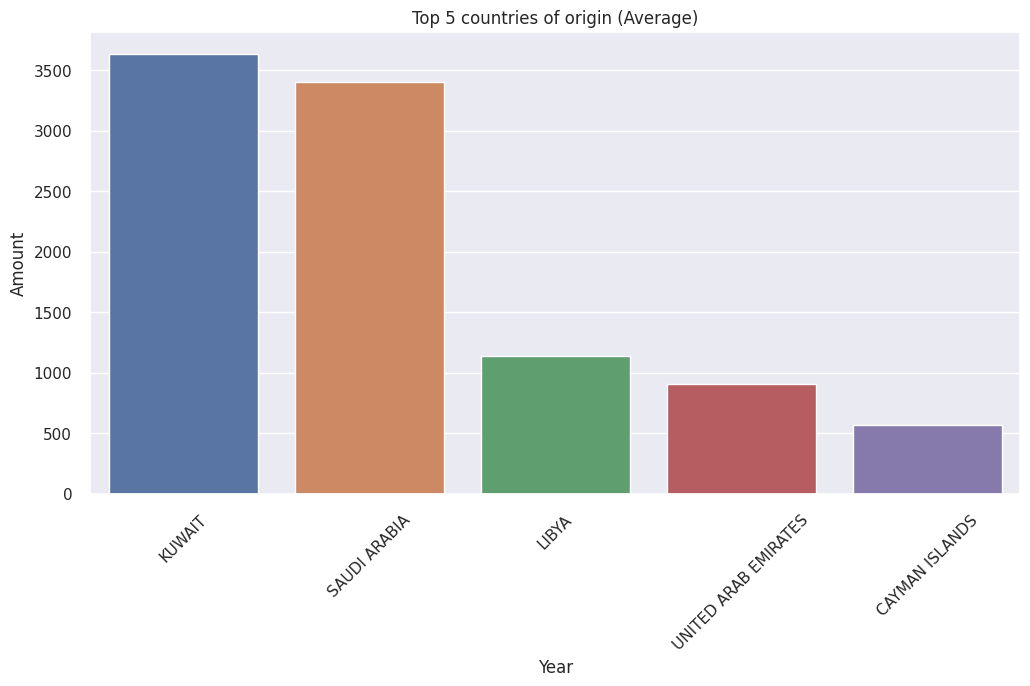

In [244]:
#first visual (Top 5 countries that are investing in Bahrain)

#grouping by country, and calculating the mean of the amount
fdi_country = df.groupby('country')['amount'].mean().reset_index()
#sorting the rows by the amount column descending, and only showing the top 5
fdi_country = fdi_country.sort_values('amount', ascending=False).head(5)

#plotting a bar plot
sns.set(rc={'figure.figsize': (12, 6)})

plot = sns.barplot(fdi_country, x='country', y='amount')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.title('Top 5 countries of origin (Average)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

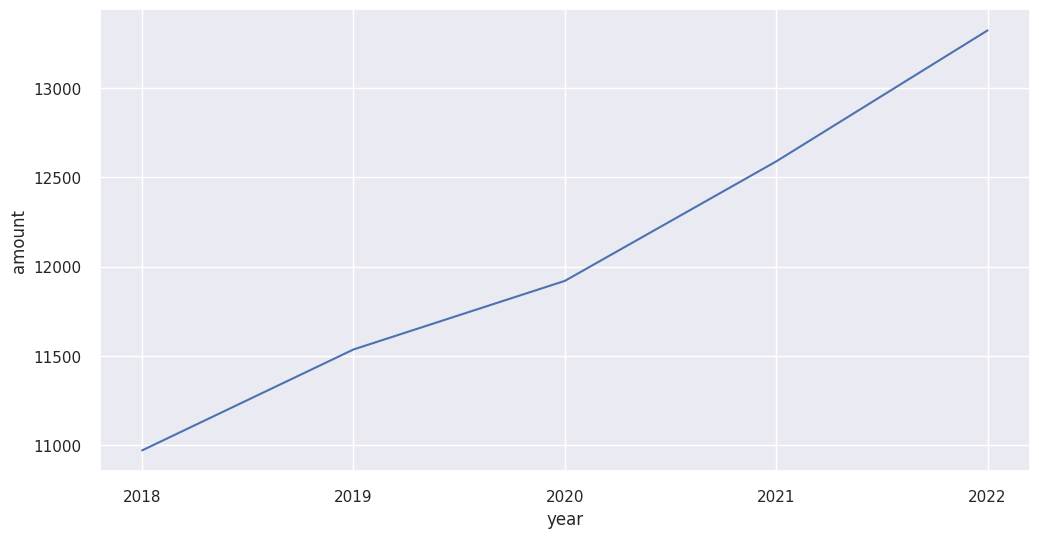

In [245]:
#Second visual (the total investments from df for the period 2018 - 2022)

total_years = df.groupby('year')['amount'].sum()
ax = sns.lineplot(total_years)
ax.set_xticks([2018,2019, 2020, 2021, 2022])

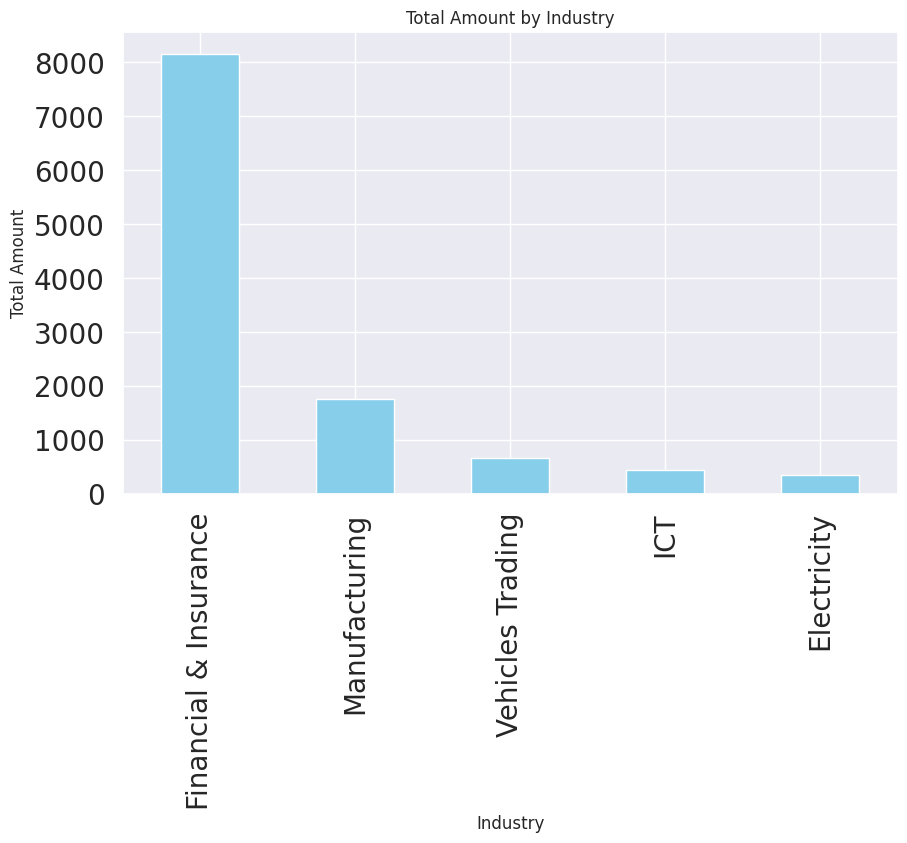

In [246]:
#Third visual (the top 5 industries that investors investing in)

#grouping by the industry in df2 and calculating the mean of the amount and then sorting values
z = df2.groupby('industry')['amount'].mean().sort_values(ascending=False)
#showing only the top 5
z = z.head()

#plotting a bar chart
plt.figure(figsize=(10, 6))
z.plot(kind='bar', color='skyblue')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Total Amount by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Amount')
plt.show()

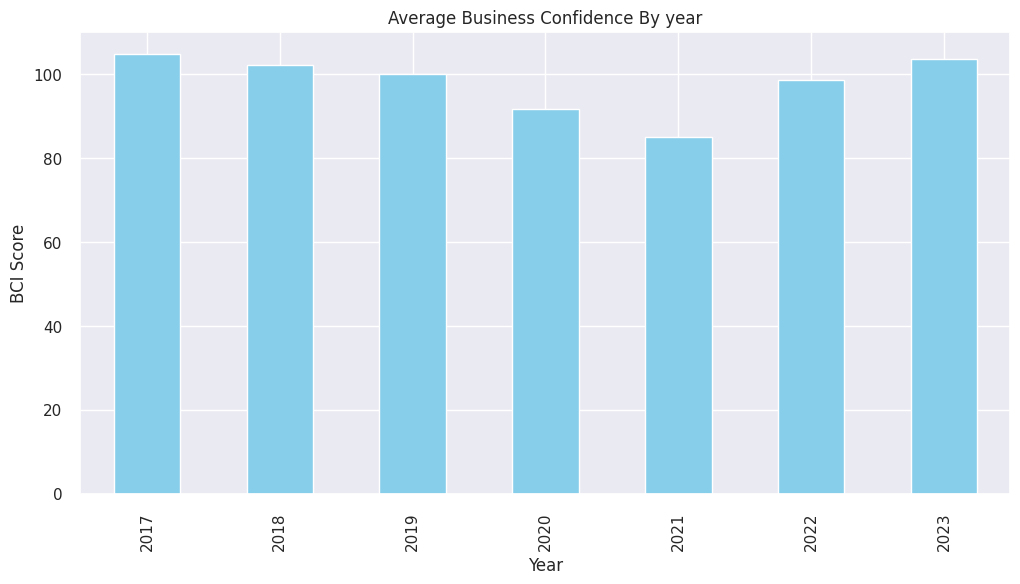

In [247]:
#Fourth visual (The average business confidence socre for the period 2017 - 2023)

#grouping by the year and calculating the mean
bci_by_year = bci.groupby('year')['bci'].mean()

#plotting a bar chart
bci_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Business Confidence By year')
plt.xlabel('Year')
plt.ylabel('BCI Score')
plt.show()

In [248]:
#adding a new row in gdp dataset to calculate the sum of GCC gdp

gcc_row = {'country':'GCC', 'GDP':gdp['GDP'][0:6].sum()}
gdp = gdp.append(gcc_row, ignore_index=True)

<Axes: xlabel='country'>

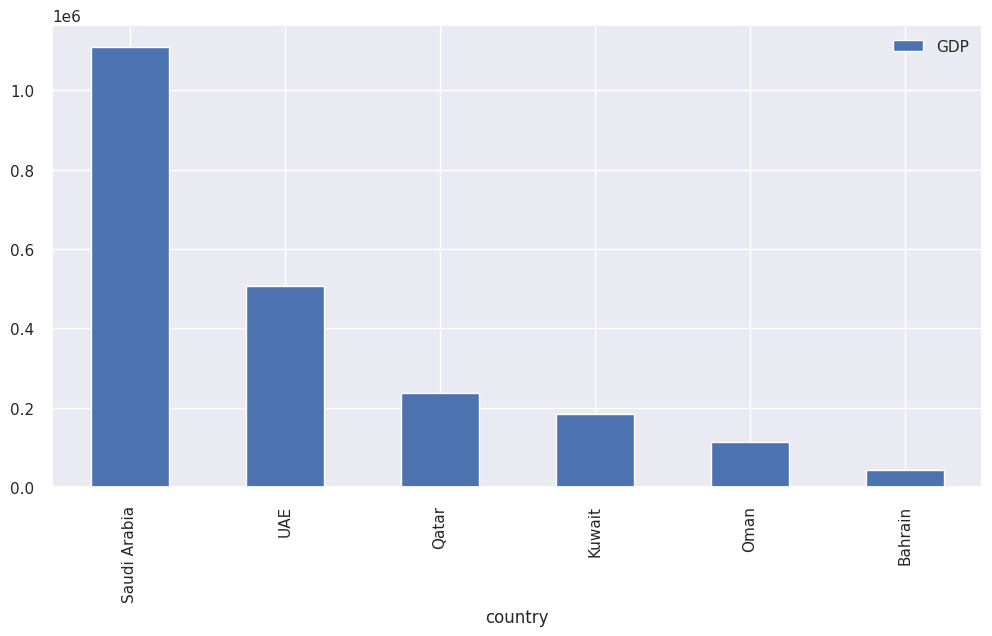

In [249]:
#Fifth visual (GCC countries gdp)
c = gdp[:6].sort_values('GDP', ascending = False)
c.plot(kind='bar', x='country', y='GDP')

<Axes: xlabel='country'>

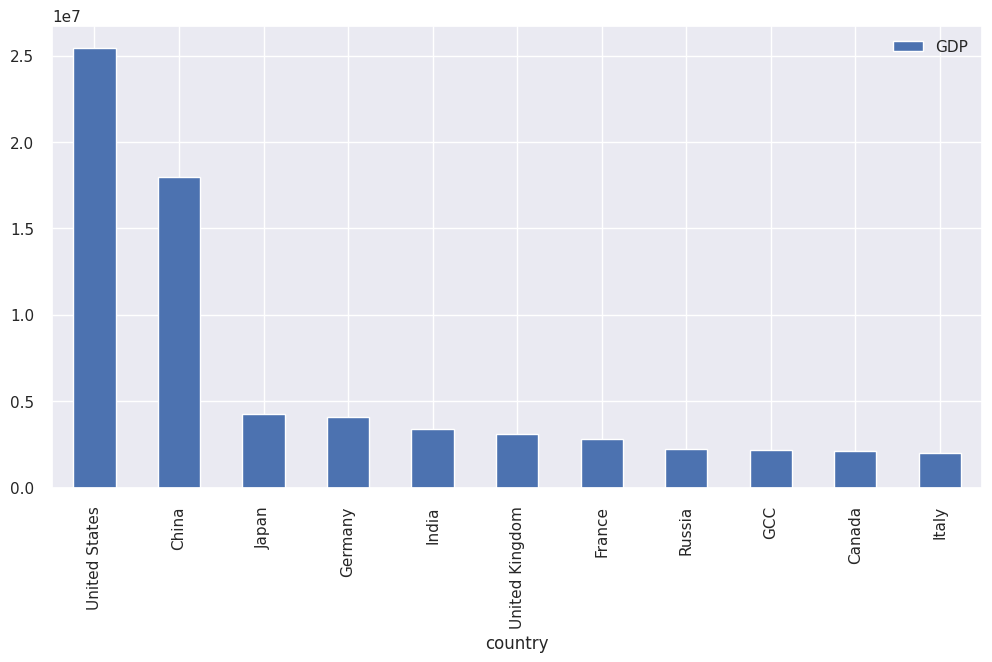

In [250]:
#Sixth visual (GCC VS. WORLD top gdp countries)
g = gdp.sort_values('GDP', ascending=False)
g[:11].plot(kind='bar', x='country', y='GDP')

In [251]:
fdi_gdp_prc

,country,2017,2018,2019,2020,2021,2022
0,Bahrain,1.5,0.3,4.0,3.0,4.5,4.4
1,Saudi Arabia,0.2,0.5,0.5,0.7,2.2,0.7
2,Kuwait,0.1,0.0,0.4,-0.5,-0.2,0.4
3,UAE,2.7,2.4,4.3,5.7,5.0,4.5
4,Qatar,0.6,-1.2,-1.6,-1.7,-0.6,0.0
5,Oman,3.7,7.1,4.8,3.8,4.6,3.2
6,Singapore,29.8,21.5,27.9,22.5,32.7,30.2
7,Malta,28.8,29.3,27.5,30.3,26.8,27.1
8,Maldives,9.6,10.9,17.1,11.8,11.9,11.7
9,Brunei,3.9,3.8,2.8,4.7,1.5,-1.8


In [252]:
#Adding a row as the mean of gcc
new_row = {
    'country':'GCC',
    '2017': fdi_gdp_prc['2017'][1:6].mean(),
    '2018':fdi_gdp_prc['2018'][1:6].mean(),
    '2019':fdi_gdp_prc['2019'][1:6].mean(),
    '2020':fdi_gdp_prc['2020'][1:6].mean(),
    '2021':fdi_gdp_prc['2021'][1:6].mean(),
    '2022':fdi_gdp_prc['2022'][1:6].mean()
}

fdi_gdp_prc = fdi_gdp_prc.append(new_row, ignore_index = True)

In [253]:
#Creating a new dataframe without gcc countries
temp = fdi_gdp_prc
for x in range(1, 6):
  temp = temp.drop(x)

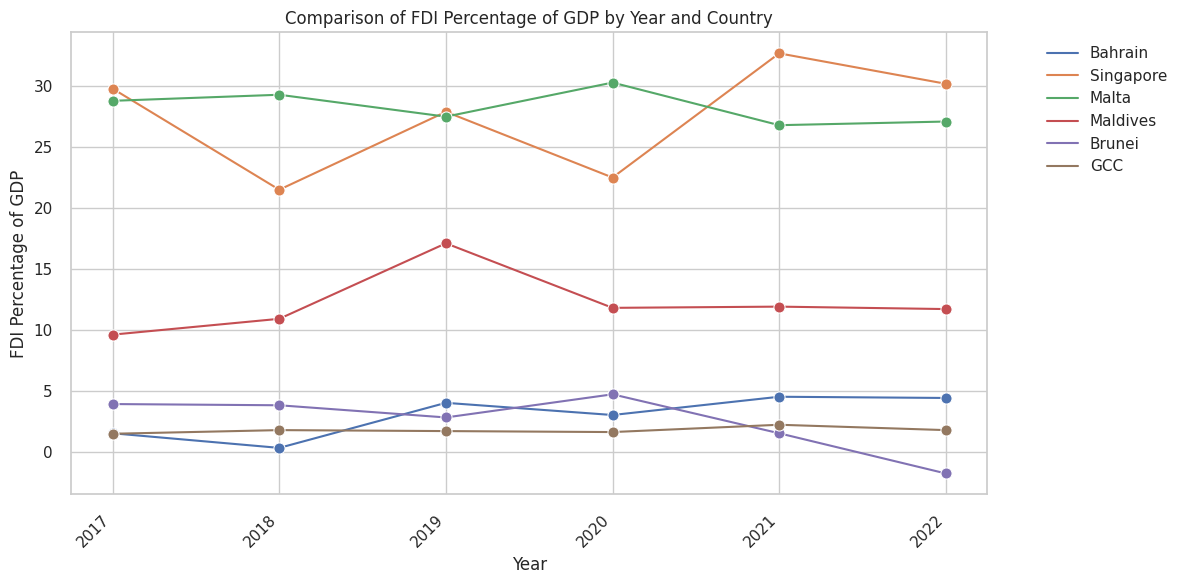

In [254]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))

#Using pd.melt to unpivot the dataframe
df_long = pd.melt(temp, id_vars=['country'], var_name='Year', value_name='FDI Percentage of GDP')

# plotting a line chart
sns.lineplot(data=df_long, x='Year', y='FDI Percentage of GDP', hue='country', marker='o', markersize=8)


plt.xticks(rotation=45, ha='right')


plt.xlabel('Year')
plt.ylabel('FDI Percentage of GDP')
plt.title('Comparison of FDI Percentage of GDP by Year and Country')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Axes: xlabel='Country'>

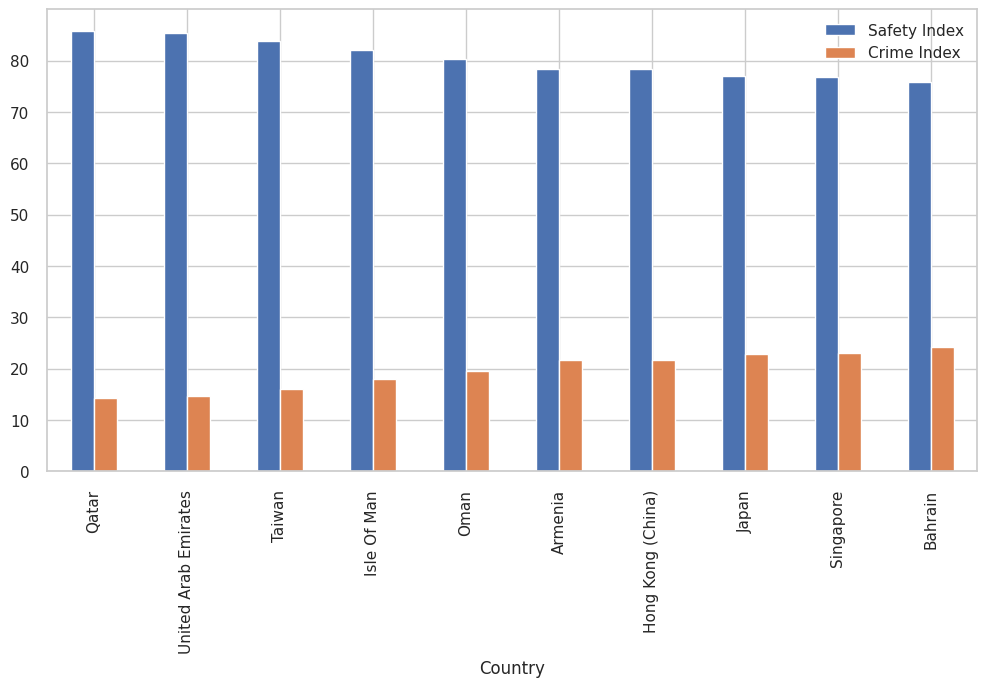

In [255]:
#Creating a plot with the top 10 safest countries in the world
crime[::-1].head(10).plot(kind='bar', x='Country', y=['Safety Index', 'Crime Index'])

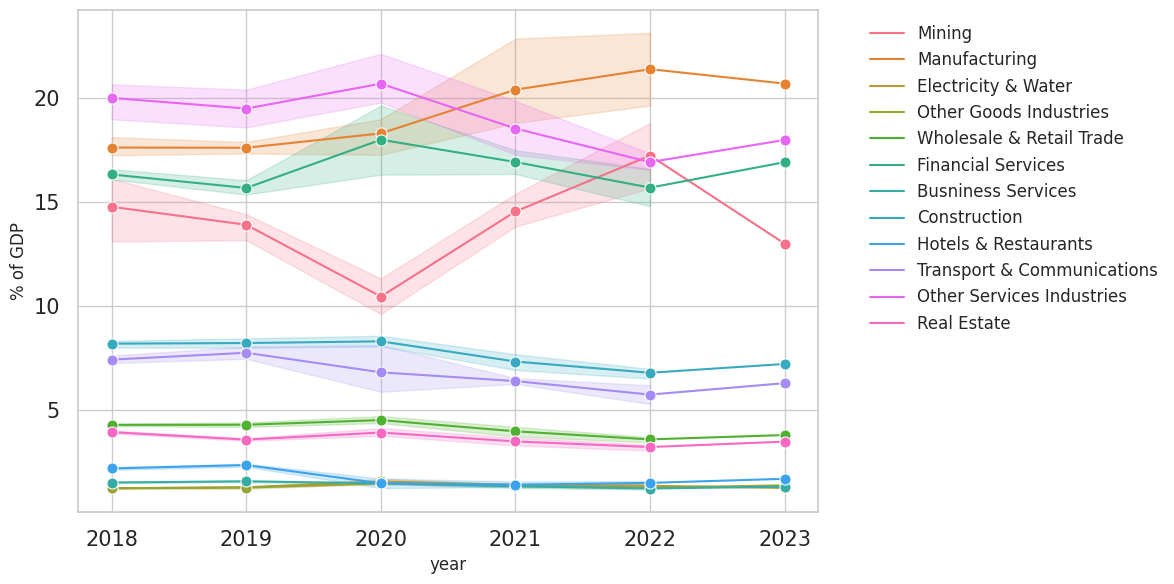

In [256]:

#Set the style of the plot
sns.set(style="whitegrid")



# Create a line plot
plt.figure(figsize=(12, 6))
# plotting a line chart
sns.lineplot(data=gdp_ind, x='year', y='percentage', hue='activity', marker='o', markersize=8)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('% of GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

In [257]:
#Creating a temp dataframe to sort values and to create a new dataframe with
#last year population data for easier plotting
temp3 = population.sort_values('year', ascending=False)

last_pop = pd.DataFrame({
    'year':[temp3['year'][135], temp3['year'][134], temp3['year'][55], temp3['year'][54]],
    'nationality':[temp3['nationality'][135], temp3['nationality'][134], temp3['nationality'][55], temp3['nationality'][54]],
    'population':[temp3['population'][135], temp3['population'][134], temp3['population'][55], temp3['population'][54]],
    'gender':[temp3['sex'][135], temp3['sex'][134], temp3['sex'][55], temp3['sex'][54]],
})

<Axes: xlabel='nationality', ylabel='population'>

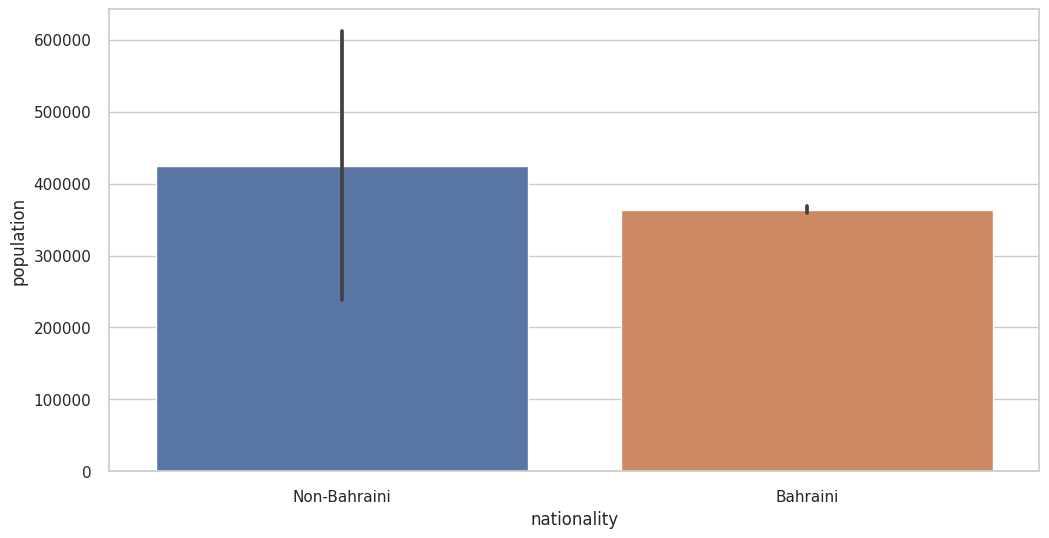

In [258]:
#plotting population (Bahrain vs. Non-Bahraini)

last_pop.groupby('nationality')['population'].sum()
sns.barplot(data=last_pop, x='nationality', y='population')

<Axes: xlabel='education_level'>

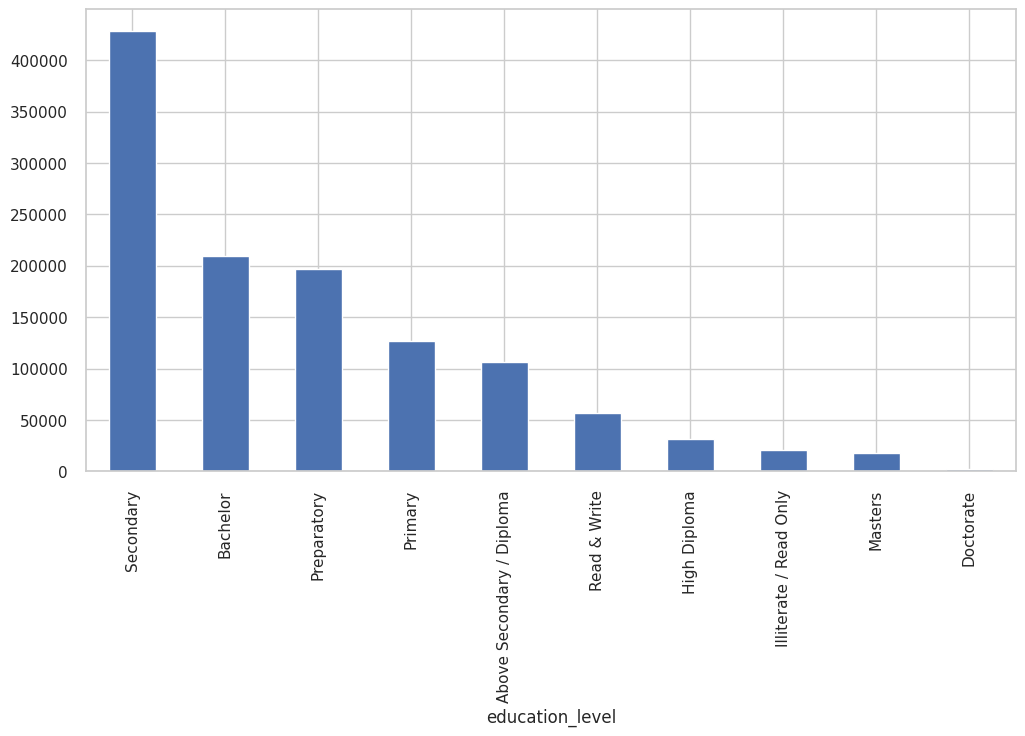

In [259]:
#grouping by education level and adding all the population togeather to find the total num of holders of each level
education.groupby('education_level')['population'].sum().sort_values(ascending=False).plot(kind='bar')

#EDB Website Scraper  & Words frequency analysis




---



Import libraries

In [260]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import PIL.Image
import matplotlib.pyplot as plt
import random
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [261]:
def edb_scraper(link):
  '''
  This is a function that takes in the link of an article
  from the EDB website and scrape the the data for the title and article content
  '''
  temp = []

  edb_request = requests.get(link, verify=False).text
  edb_soup = bs(edb_request, 'html.parser')

  for x in edb_soup.select('h1'):
    temp.append(x.get_text())

  for x in edb_soup.select('p'):
   temp.append(x.get_text()[:-3])

  temp = temp[:-3]
  return temp


In [262]:
#All the article links in the EDB website 500+ articles
links = ['https://www.bahrainedb.com/latest-news/bahrain-tops-global-destinations-for-expats-living-and-working-abroad-in-2023',
         'https://www.bahrainedb.com/latest-news/bahrain-secures-a-record-usd-1-95-billion-in-fdi-inflows-in-2022-according-to-un-report',
         'https://www.bahrainedb.com/latest-news/bahrain-set-to-unveil-pwc-middle-easts-latest-regional-service-centre',
         'https://www.bahrainedb.com/latest-news/hrh-the-cp-pm-and-chairman-of-the-bahrain-economic-development-board-chairs-the-bahrain-edb-board-meeting',
         'https://www.bahrainedb.com/latest-news/bahrain-grants-inaugural-golden-licenses-to-five-projects-with-a-cumulative-investment-of-upwards-of-usd-1-4-billion',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-2nd-in-the-arab-world-34th-globally-as-most-improving-country-in-gcc-on-the-world-banks-logistics-performance-index-2023',
         'https://www.bahrainedb.com/latest-news/bahrain-welcomes-singapores-whampoa-groups-new-digital-bank-initiative',
         'https://www.bahrainedb.com/latest-news/kpmg-and-bahrain-edb-host-seminar-on-convertible-notes-for-financing-start-ups',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-1st-in-mena-for-financial-investment-and-trade-freedom-on-the-heritage-foundations-2023-index-of-economic-freedom',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-chief-executive-meets-with-the-kingdom-of-saudi-arabias-minister-of-investment',
         'https://www.bahrainedb.com/latest-news/a-high-level-delegation-from-bahrain-wraps-up-a-successful-visit-to-japan-and-south-korea',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-to-host-second-quarterly-business-law-forum-for-2023',
         'https://www.bahrainedb.com/latest-news/a-bahraini-high-level-delegation-heads-to-japan-and-south-korea-to-promote-investment-opportunities',
         'https://www.bahrainedb.com/latest-news/howden-accelerates-growth-in-the-gulf-with-the-establishment-of-howden-bahrain',
         'https://www.bahrainedb.com/latest-news/the-kingdom-of-bahrain-launches-golden-license-to-attract-large-scale-investment-projects',
         'https://www.bahrainedb.com/latest-news/reboot01-contributes-to-cementing-bahrains-position-as-a-regional-hub-for-innovation-and-tech',
         'https://www.bahrainedb.com/latest-news/aptar-closures-broadens-middle-east-reach-with-gulf-closures-deal-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-1st-globally-as-the-best-destination-for-getting-started-abroad-in-2023',
         'https://www.bahrainedb.com/latest-news/two-indian-companies-to-launch-in-bahrain-with-an-expected-total-investment-of-around-usd45-million',
         'https://www.bahrainedb.com/latest-news/bahrains-high-level-economic-delegation-concludes-a-successful-visit-to-india',
         'https://www.bahrainedb.com/latest-news/a-high-level-bahraini-delegation-heads-to-india-to-promote-investment-opportunities',
         'https://www.bahrainedb.com/latest-news/global-logistics-company-malca-amit-launches-operations-for-valuable-goods-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-tops-global-and-regional-rankings-in-2022',
         'https://www.bahrainedb.com/latest-news/bahrain-is-28-more-cost-effective-in-ict-direct-operating-costs-when-compared-to-its-gcc-peers',
         'https://www.bahrainedb.com/latest-news/leading-cargo-airline-group-asia-cargo-network-starts-its-mena-operations-from-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrains-delegation-successfully-concludes-participation-in-wef-2023',
         'https://www.bahrainedb.com/latest-news/kpmg-report-financial-institutions-in-bahrain-enjoy-an-operational-cost-advantage-up-to-27',
         'https://www.bahrainedb.com/latest-news/a-high-level-bahraini-delegation-participates-in-wef-2023',
         'https://www.bahrainedb.com/latest-news/citi-global-tech-hub-in-bahrain-is-on-track-to-employ-1000-bahraini-coders',
         'https://www.bahrainedb.com/latest-news/edb-attracts-a-record-usd-1-1-billion-in-direct-investment-in-2022',
         'https://www.bahrainedb.com/latest-news/leading-digital-marketing-academy-growth-velocity-moves-its-headquarters-to-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-attracts-usd291-million-worth-of-investment-in-the-tourism-sector',
         'https://www.bahrainedb.com/latest-news/worlds-3rd-largest-freight-forwarder-dsv-opens-regional-logistics-hub-in-bahrain-logistic-zone',
         'https://www.bahrainedb.com/latest-news/g4s-cash-solutions-invests-more-than-us-3-million',
         'https://www.bahrainedb.com/latest-news/bahrain-grown-bambucorn-obtains-crowdfunding-operator-license-cbb',
         'https://www.bahrainedb.com/latest-news/bahrain-attracts-us72-7-million-worth-of-investment-in-financial-services',
         'https://www.bahrainedb.com/latest-news/tamkeen-announces-a-pitching-and-fundraising-training-program-for-bahraini-entrepreneurs-startup-bahrain-pitch',
         'https://www.bahrainedb.com/latest-news/binance-bh-goes-live-in-bahrain',
         'https://www.bahrainedb.com/latest-news/saudi-fdi-stock-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-attracts-usd98-million-worth-of-direct-investments-in-ict-sector',
         'https://www.bahrainedb.com/latest-news/bahrain-attracts-usd290-million-in-direct-investment-in-manufacturing-and-logistics',
         'https://www.bahrainedb.com/latest-news/hrh-the-deputy-king-chairs-edb-board-meeting',
         'https://www.bahrainedb.com/latest-news/edb-chief-executive-meets-with-the-seventh-intake-of-the-prime-ministers-fellowship-program',
         'https://www.bahrainedb.com/latest-news/global-training-provider-franklincovey-launches-first-middle-east-education-headquarters-in-bahrain',
         'https://www.bahrainedb.com/latest-news/tamkeen-supports-the-employment-of-around-120-bahrainis-in-gig-gulf',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-1st-globally-in-female-digital-skills-training-and-stem-education',
         'https://www.bahrainedb.com/latest-news/bahrain-spire-technologies-expands-in-mena-with-a-bd-15-million-investment-plan-supported-by-bahrain-economic-development-board',
         'https://www.bahrainedb.com/latest-news/al-bayrooni-launches-first-stand-alone-kidney-treatment-centre-in-bahrain',
         'https://www.bahrainedb.com/latest-news/chinas-icool-sets-up-a-us10-7-million-manufacturing-facility-in-bahrain-to-serve-middle-east-us-and-european-markets-2fdi-inflows-to-bahrain-increase-by-73-in-2021-surpassing-global-average',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-1st-in-ground-and-port-infrastructure-according-to-wefs-2021-travel-and-tourism-development-index',
         'https://www.bahrainedb.com/latest-news/chinas-icool-sets-up-a-us10-7-million-manufacturing-facility-in-bahrain-to-serve-middle-east-us-and-european-markets',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-2nd-in-mena-and-3rd-globally-in-islamic-finance',
         'https://www.bahrainedb.com/latest-news/central-bank-of-bahrain-issues-revised-collective-investment-undertakings-regulations',
         'https://www.bahrainedb.com/latest-news/arla-foods-completes-63mn-bahrain-production-site-expansion',
         'https://www.bahrainedb.com/latest-news/under-the-patronage-of-h-e-jameel-ben-mohamed-ali-humaidan-talabat-announces-the-establishment-of-one-of-the-largest-regional-local-shared-services-centers-in-bahrain-providing-1000-jobs-in-bahrai',
         'https://www.bahrainedb.com/latest-news/binance-awarded-crypto-asset-service-provider-license-in-the-kingdom-of-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-among-top-15-markets-worldwide-in-the-agility-emerging-markets-logistics-index',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-1st-in-mena-for-financial-investment-and-trade-freedom-according-to-the-heritage-foundation-index',
         'https://www.bahrainedb.com/latest-news/tap-payments-grows-client-base-by-60-in-a-year-as-global-firms-seek-to-tap-into-gulfs-29bn-e-commerce-boom',
         'https://www.bahrainedb.com/latest-news/bahrains-real-estate-transactions-jump-46-in-2021',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-and-japan-external-trade-organization-sign-mou-to-promote-direct-investments',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-fourth-globally-and-second-in-mena-for-islamic-finance-development-indicator',
         'https://www.bahrainedb.com/latest-news/mueller-middle-east-exceeds-100m-in-annual-exports-from-bahrain-trading-hub',
         'https://www.bahrainedb.com/latest-news/bahrain-launches-investment-platform-enabling-investor-access-to-investment-opportunities-in-the-kingdom-strategic-projects-valued-over-usd30-billion',
         'https://www.bahrainedb.com/latest-news/bahrains-aluminium-cluster-grows-with-addition-of-gccs-first-plant-for-aluminium-grain-refiners',
         'https://www.bahrainedb.com/latest-news/economic-development-board-attracts-nearly-40m-in-tourism-investments-ahead-of-industrys-bounce-back',
         'https://www.bahrainedb.com/latest-news/edb-outlines-initiatives-to-develop-key-economic-sectors',
         'https://www.bahrainedb.com/latest-news/bahrain-launches-the-fastest-global-sea-to-air-logistics-hub-in-the-region',
         'https://www.bahrainedb.com/latest-news/citi-launches-global-technology-hub-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-ranked-among-top-twenty-global-economies-in-attracting-investments',
         'https://www.bahrainedb.com/latest-news/can-the-middle-east-produce-a-cyber-security-firm-to-challenge-silicon-valley',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-first-for-ict-talent-in-the-gcc-according-to-un-report',
         'https://www.bahrainedb.com/latest-news/trade-between-bahrain-and-gcc-jumps-to-1-69bn-in-q2',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-recognised-globally-for-its-resilience-in-navigating-the-pandemic',
         'https://www.bahrainedb.com/latest-news/pioneering-innovation-student-centricity-aubh-launches-alexa-skills-to-connect-with-students-through-voice-technology',
         'https://www.bahrainedb.com/latest-news/bahrains-fdi-inflows-reach-1-billion-in-2020',
         'https://www.bahrainedb.com/latest-news/bahrain-tops-global-financial-attractiveness-rankings-for-3rd-consecutive-year',
         'https://www.bahrainedb.com/latest-news/foundation-holdings-to-invest-30m-in-healthcare-and-education-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-property-transactions-jump-36-in-q1-2021',
         'https://www.bahrainedb.com/latest-news/bahrain-tops-gcc-rankings-as-best-place-for-expats-to-live',
         'https://www.bahrainedb.com/latest-news/bahrain-real-estate-sector-deals-valued-at-us-1-9-billion-in-2020',
         'https://www.bahrainedb.com/latest-news/tencent-cloud-deploys-its-first-mena-region-internet-data-centre-hub-in-bahrain',
         'https://www.bahrainedb.com/latest-news/in-depth-tokenisation-transformation-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-attracts-us885m-investment-in-2020',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-appoints-an-advisor-to-the-board',
         'https://www.bahrainedb.com/latest-news/bahrain-ranked-in-worlds-top-five-islamic-finance-economies-by-the-islamic-development-bank',
         'https://www.bahrainedb.com/latest-news/first-insurance-platform-graduates-from-cbb-regulatory-sandbox-tech-disrupter-tasweya-platform-set-to-unlock-millions-for-bahrain-based-insurance-companies',
         'https://www.bahrainedb.com/latest-news/q3-saudi-bahrain-trade-surges-by-43',
         'https://www.bahrainedb.com/latest-news/saudi-bahrain-trade-returns-to-pre-covid-levels-amid-increase-in-h1-figures',
         'https://www.bahrainedb.com/latest-news/uae-bahrain-trade-returning-to-pre-covid-levels-h1-figures-show',
         'https://www.bahrainedb.com/latest-news/central-bank-of-bahrain-launches-a-first-of-its-kind-fintech-platform-to-drive-innovation-in-the-region',
         'https://www.bahrainedb.com/latest-news/gcc-small-business-boom-to-drive-post-covid-economy-as-commercial-registrations-soar',
         'https://www.bahrainedb.com/latest-news/bahrain-grants-uk-fintech-fasset-first-of-its-kind-authorisation-to-test-blockchain-based-solution-for-addressing-us-15-trillion-sustainable-infrastructure-funding-gap',
         'https://www.bahrainedb.com/latest-news/world-bank-ranks-bahrain-and-uae-top-arab-nations-for-human-capital',
         'https://www.bahrainedb.com/latest-news/why-digitalisation-has-helped-bahraini-banks-escape-the-brunt-of-covid-19',
         'https://www.bahrainedb.com/latest-news/central-bank-of-bahrain-launches-tokenization-service-for-contactless-payment-2',
         'https://www.bahrainedb.com/latest-news/the-economist-x-bahrain-edb-the-regions-digital-transformation',
         'https://www.bahrainedb.com/latest-news/bahrain-and-sharjah-among-worlds-top-5-start-up-hubs-new-report',
         'https://www.bahrainedb.com/latest-news/bahrain-maintains-2nd-place-among-arab-countries-in-un-egovernment-development-index-2020',
         'https://www.bahrainedb.com/latest-news/uae-and-bahrain-rise-in-worlds-top-100-startup-destinations-ranking',
         'https://www.bahrainedb.com/latest-news/bahrain-becomes-1st-country-in-mena-to-ratify-united-nations-treaty-on-electronic-communications',
         'https://www.bahrainedb.com/latest-news/saaya-health-covid-sputs-growth-as-several-global-brands-sign-deals',
         'https://www.bahrainedb.com/latest-news/gcc-set-for-fintech-surge-reveals-mastercard-study',
         'https://www.bahrainedb.com/latest-news/bahrain-aiming-to-be-startup-capital-of-the-world',
         'https://www.bahrainedb.com/latest-news/gcc-set-for-fintech-surge-during-global-covid-19-outbreak',
         'https://www.bahrainedb.com/latest-news/bahrain-and-portugal-enter-proactive-initiative-to-support-startups-globally-during-covid-19',
         'https://www.bahrainedb.com/latest-news/startups-supporting-bahrains-self-isolation',
         'https://www.bahrainedb.com/latest-news/women-are-nearly-a-third-of-investors-on-bahrain-bourse',
         'https://www.bahrainedb.com/latest-news/why-bahrain-can-become-a-major-hub-for-finance-and-technology',
         'https://www.bahrainedb.com/latest-news/the-italian-trade-agency-ice-to-open-an-office-in-bahrain',
         'https://www.bahrainedb.com/latest-news/standard-chartered-partners-with-bahrain-fintech-bay-to-foster-fintech-innovation-in-the-kingdom',
         'https://www.bahrainedb.com/latest-news/bahrain-fintech-bay-announces-new-ceo',
         'https://www.bahrainedb.com/latest-news/bahrain-partners-with-the-world-economic-forum-to-launch-closing-the-skills-gap-accelerator',
         'https://www.bahrainedb.com/latest-news/bahrain-and-karnataka-sign-memorandum-of-understanding-promoting-cooperation-in-fintech-ai-iot-and-cyber-security',
         'https://www.bahrainedb.com/latest-news/milken-institute-highlights-bahrains-progress-toward-becoming-a-major-technology-and-innovation-hub',
         'https://www.bahrainedb.com/latest-news/new-brand-identity-for-bahraini-goods',
         'https://www.bahrainedb.com/latest-news/bahrain-jcw-x-raid-team-victorious-at-the-2020-edition-of-the-dakar-rally-with-carlos-sainz-in-the-drivers-seat',
         'https://www.bahrainedb.com/latest-news/bahrain-sponsors-x-raid-rally-team-to-join-dakar-rally-in-saudi-arabia',
         'https://www.bahrainedb.com/latest-news/48-reasons-to-love-bahrain-from-its-unesco-world-heritage-sites-to-manamas-souq',
         'https://www.bahrainedb.com/latest-news/al-salam-bank-bahrain-supports-omp-racing-s-p-a-in-the-acquisition-of-bell-racing-helmets-group',
         'https://www.bahrainedb.com/latest-news/first-global-fintech-firm-lists-on-bahrain-investment-market',
         'https://www.bahrainedb.com/latest-news/the-kingdom-of-bahrain-is-taking-steady-and-promising-steps-to-enhance-the-business-environment-in-international-indexes',
         'https://www.bahrainedb.com/latest-news/bahrains-bankruptcy-law-one-year-on-an-untested-revolution',
         'https://www.bahrainedb.com/latest-news/revealed-how-bahrain-india-plan-to-seek-closer-economic-ties',
         'https://www.bahrainedb.com/latest-news/regions-leading-personal-finance-comparison-platform-souqalmal-com-is-now-live-in-bahrain',
         'https://www.bahrainedb.com/latest-news/attracting-more-than-5000-participant-and-45-local-and-regional-speakers-tamkeen-concludes-its-fourth-edition-of-the-global-entrepreneurship-week',
         'https://www.bahrainedb.com/latest-news/al-salam-bank-bahrain-and-msa-capital-china-to-launch-50-million-mec-ventures-positioning-bahrain-as-menas-gateway-to-the-digital-silk-road',
         'https://www.bahrainedb.com/latest-news/bahrain-ranked-first-in-mena-by-islamic-finance-development-indicator-for-seventh-consecutive-year',
         'https://www.bahrainedb.com/latest-news/uae-national-day-2019-10-reasons-to-visit-bahrain-for-the-long-weekend',
         'https://www.bahrainedb.com/latest-news/university-of-strathclyde-to-teach-pioneering-fintech-degree-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-readies-for-320bn-middle-east-ai-boom-with-wef-future-tech-workshop',
         'https://www.bahrainedb.com/latest-news/bahrain-turkey-trade-set-to-grow',
         'https://www.bahrainedb.com/latest-news/amazon-awards-specialized-cloud-computing-certifications-to-employees-of-five-government-entities',
         'https://www.bahrainedb.com/latest-news/bahrain-to-fast-track-setup-process-for-global-startups',
         'https://www.bahrainedb.com/latest-news/bd52m-mall-of-dilmunia-receives-great-interest',
         'https://www.bahrainedb.com/latest-news/bahrain-could-soon-turn-into-specialised-health-care-destination',
         'https://www.bahrainedb.com/latest-news/bahrain-tops-region-for-expat-living',
         'https://www.bahrainedb.com/latest-news/accor-to-open-first-raffles-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrains-stem-cell-bank-project-expected-to-advance-medical-trials',
         'https://www.bahrainedb.com/latest-news/bahrain-diyar-al-muharraqs-largest-park-on-way',
         'https://www.bahrainedb.com/latest-news/rallye-du-maroc-peterhansel-wins-the-fia-world-cup-for-cross-country-rallies',
         'https://www.bahrainedb.com/latest-news/bahrain-and-kerala-sign-mou-for-cooperation-in-fintech-ict-iot-startups',
         'https://www.bahrainedb.com/latest-news/bahrain-best-place-for-expats-in-middle-east-reveals-new-study',
         'https://www.bahrainedb.com/latest-news/dakar-2020-sainz-and-peterhansel-in-the-x-raid-mini-jcw-buggy',
         'https://www.bahrainedb.com/latest-news/bahrains-fintech-bay-moving-to-the-next-generation-of-banking',
         'https://www.bahrainedb.com/latest-news/worlds-largest-underwater-theme-park-opens-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bfb-ties-up-with-us-university-to-offer-ai-courses',
         'https://www.bahrainedb.com/latest-news/bahrains-trade-with-britain-reaches-1-33bln',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-appoints-khalid-humaidan-as-new-chief-executive',
         'https://www.bahrainedb.com/latest-news/56-indian-firms-in-talks-to-invest-in-bahrain-ahead-of-modis-visit',
         'https://www.bahrainedb.com/latest-news/life-on-cloud-amazon',
         'https://www.bahrainedb.com/latest-news/cryptocurrency-regulations-reuters',
         'https://www.bahrainedb.com/latest-news/bd3m-miyar-food-factory-eyeing-international-market',
         'https://www.bahrainedb.com/latest-news/bahrain-can-lead-region-in-artificial-intelligence',
         'https://www.bahrainedb.com/latest-news/amazon-web-services-launches-middle-east-region-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-crypto-exchange-rain-secures-mideasts-first-licence',
         'https://www.bahrainedb.com/latest-news/bahrains-new-bankruptcy-law',
         'https://www.bahrainedb.com/latest-news/bahrain-bourse-turns-to-aws-cloud-technology',
         'https://www.bahrainedb.com/latest-news/uk-tech-firm-helping-middle-east-play-global-catch-up',
         'https://www.bahrainedb.com/latest-news/bahrain-and-uk-first-in-the-world-to-pilot-new-artificial-intelligence-procurement-guidelines-across-government',
         'https://www.bahrainedb.com/latest-news/the-family-office-launches-programme-to-sponsor-100-bahrainis-to-attend-digital-transformation-courses',
         'https://www.bahrainedb.com/latest-news/the-national-bank-of-bahrain-takes-the-lead-as-the-first-bank-in-mena-to-provide-open-banking-services',
         'https://www.bahrainedb.com/latest-news/bahrain-highlights-its-plans-to-target-insurtech-as-part-of-its-fintech-strategy-during-uk-roadshow',
         'https://www.bahrainedb.com/latest-news/game-of-hubs-the-battle-for-the-middle-easts-startup-capital',
         'https://www.bahrainedb.com/latest-news/tech-startups-to-watch',
         'https://www.bahrainedb.com/latest-news/jersey-and-bahrain-sign-digital-innovation-agreement',
         'https://www.bahrainedb.com/latest-news/startups',
         'https://www.bahrainedb.com/latest-news/bahraini-business-delegation-signs-2-billion-worth-of-agreements-with-french-companies',
         'https://www.bahrainedb.com/latest-news/bahraini-business-delegation-visits-le-swave-fintech-incubator-and-signs-joint-cooperation-agreement',
         'https://www.bahrainedb.com/latest-news/jarir-bookstore-to-open-in-bahrain-with-an-investment-of-around-usd-10-million-bhd-4-million',
         'https://www.bahrainedb.com/latest-news/wonder-news-launch-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-singapore-of-the-middle-east',
         'https://www.bahrainedb.com/latest-news/areije-al-shakar-alwaha-fund-of-funds',
         'https://www.bahrainedb.com/latest-news/100-arab-startups-special-programme',
         'https://www.bahrainedb.com/latest-news/bahrain-welcomes-first-proptech-concept-estater',
         'https://www.bahrainedb.com/latest-news/a-country-poised-to-seize-the-future',
         'https://www.bahrainedb.com/latest-news/startup-bahrain-week-returns-with-more-support-for-founders-than-ever',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-announces-the-launch-of-beehive-bahrain-limited-w-l-l',
         'https://www.bahrainedb.com/latest-news/sharia-compliant-cryptocurrency-exchange-rain-graduates-cbb-regulatory-sandbox-licensure-looming',
         'https://www.bahrainedb.com/latest-news/middle-easts-biggest-innovation-festival-unbound-returns-to-bahrain',
         'https://www.bahrainedb.com/latest-news/startup-bahrain-week-draws-innovators-and-investors-to-leading-entrepreneurial-forums',
         'https://www.bahrainedb.com/latest-news/middle-easts-fintech-revolution-to-be-showcased-in-bahrain',
         'https://www.bahrainedb.com/latest-news/infrastructure-and-construction-underpin-continuity-in-bahrains-non-oil-growth',
         'https://www.bahrainedb.com/latest-news/bahrain-creates-history-as-first-nation-to-enact-uncitral-model-law-on-electronic-transferable-records',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-attracts-investments-worth-bhd314-million-in-2018',
         'https://www.bahrainedb.com/latest-news/delegation-organised-a-business-forum-attended-by-100-indian-investors',
         'https://www.bahrainedb.com/latest-news/steve-wozniak-to-speak-at-annual-gcc-financial-forum',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-signs-mou-with-maharashtra-government-to-cooperate-in-fintech',
         'https://www.bahrainedb.com/latest-news/bahrain-establishes-friendly-cooperation-with-hangzhou-to-explore-opportunities-in-cross-border-commerce',
         'https://www.bahrainedb.com/latest-news/bahrain-signs-eight-landmark-agreements-to-deepen-economic-ties-with-shenzhen',
         'https://www.bahrainedb.com/latest-news/bahrain-surges-as-welcoming-business-destination-in-2018-hsbc-expat-explorer',
         'https://www.bahrainedb.com/latest-news/bahrain-delegation-to-visit-china-to-fortify-economic-and-trade-ties-between-the-two-nations',
         'https://www.bahrainedb.com/latest-news/kmpg-report-highlights-bahrains-competitive-advantages-in-doing-business-in-the-gcc',
         'https://www.bahrainedb.com/latest-news/bahrains-broad-based-economic-recovery-gathers-pace-in-q2-thanks-to-growth-in-non-oil-sectors',
         'https://www.bahrainedb.com/latest-news/bahrains-partnership-with-amazon-web-services-wins-un-award',
         'https://www.bahrainedb.com/latest-news/bahrain-tops-world-bank-index-for-human-capital-in-mena-region',
         'https://www.bahrainedb.com/latest-news/fairway-group-begins-international-expansion-with-bahrain-launch',
         'https://www.bahrainedb.com/latest-news/bahrain-tech-week-brings-together-gulf-innovators-and-global-experts',
         'https://www.bahrainedb.com/latest-news/bahrain-enhances-investment-ecosystem-with-four-new-laws',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-attracts-810m-record-investment-as-gcc-opportunity-gathers-momentum',
         'https://www.bahrainedb.com/latest-news/bahrain-tech-week-to-showcase-new-opportunities-for-growth',
         'https://www.bahrainedb.com/latest-news/acceleration-in-project-momentum-to-drive-non-oil-growth-in-bahrain-in-2018',
         'https://www.bahrainedb.com/latest-news/bahrain-showcases-startup-ecosystem-at-rise-hong-kong-summit',
         'https://www.bahrainedb.com/latest-news/flat6labs-bahrain-officially-opens-its-doors-at-nbb-towers-as-eight-startups-gear-up-for-the-first-cycle',
         'https://www.bahrainedb.com/latest-news/brinc-batelco-iot-hub-opens',
         'https://www.bahrainedb.com/latest-news/bahrain-development-bank-announces-successful-close-100m-venture-capital-fund-funds-support-middle-east-startups',
         'https://www.bahrainedb.com/latest-news/bahrain-fdi-grows-114-reforms-boost-investment',
         'https://www.bahrainedb.com/latest-news/updated-application-processes-reduces-approval-time-land-applications-18-days-response-growing-demand-land-kingdom',
         'https://www.bahrainedb.com/latest-news/edamah-launches-bhd-7-6-million-smart-carparks-complex-terminal',
         'https://www.bahrainedb.com/latest-news/non-oil-growth-5-helps-make-bahrain-gccs-fastest-growing-economy-2017',
         'https://www.bahrainedb.com/latest-news/global-investors-convene-bahrain-unlock-gcc-opportunities',
         'https://www.bahrainedb.com/latest-news/hh-shaikh-isa-bin-salman-al-khalifa-opens-new-multi-million-dollar-mondelez-international-facility-bahrain',
         'https://www.bahrainedb.com/latest-news/edb-moda-mall-co-host-middle-east-council-shopping-centres-networking-event',
         'https://www.bahrainedb.com/latest-news/lebanese-superstar-ragheb-alama-performs-bahrain-bay',
         'https://www.bahrainedb.com/latest-news/eazy-financial-benefit-partner-introduce-regions-first-biometric-payment-network',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-participates-2018-career-week',
         'https://www.bahrainedb.com/latest-news/bahrain-participates-innovate-finance-global-summit-2018',
         'https://www.bahrainedb.com/latest-news/uk-x-factor-winner-james-arthur-set-headline-bahrain-bay-weekend-part-spring-culture',
         'https://www.bahrainedb.com/latest-news/startup-bahrain-week-supports-future-innovation-region',
         'https://www.bahrainedb.com/latest-news/likwid-friends-set-perform-distinctive-musical-concert-part-spring-culture-weekend',
         'https://www.bahrainedb.com/latest-news/legendary-kuwaiti-singers-abdallah-al-rowaished-nabil-shuail-give-unforgettable-performance-bahrain-bay',
         'https://www.bahrainedb.com/latest-news/unbound-bahrain-set-become-menas-newest-exciting-innovation-festival',
         'https://www.bahrainedb.com/latest-news/edb-tamkeen-announce-startup-bahrain-week-activities',
         'https://www.bahrainedb.com/latest-news/bahrain-fintech-bay-highlights-launch-announcement-startups-founding-partners',
         'https://www.bahrainedb.com/latest-news/13th-spring-culture-launched-press-conference-qalaat-al-bahrain-site-museum',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-attracts-us-733-million-investments-record-year',
         'https://www.bahrainedb.com/latest-news/bahrain-host-startup-bahrain-week',
         'https://www.bahrainedb.com/latest-news/bahrains-non-oil-sector-beats-expectations-4-8-growth-first-nine-months-2017',
         'https://www.bahrainedb.com/latest-news/fintastic-bahrain-week-highlight-future-financial-services',
         'https://www.bahrainedb.com/latest-news/bahrain-regional-leader-islamic-finance-development',
         'https://www.bahrainedb.com/latest-news/adgm-bahrain-economic-development-board-sign-regions-first-mena-fintech-agreement',
         'https://www.bahrainedb.com/latest-news/bahrain-host-innovation-festival-unbound-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-tourism-projects-valued-us-13-billion',
         'https://www.bahrainedb.com/latest-news/bahrains-non-oil-sector-expands-4-7-first-half-2017',
         'https://www.bahrainedb.com/latest-news/khalid-al-rumaihi-addresses-alumni-arab-conference-harvard',
         'https://www.bahrainedb.com/latest-news/intratool-group-launches-gcc-hub-bahrain',
         'https://www.bahrainedb.com/latest-news/leading-logistics-provider-opens-new-usd-20million-joint-venture-facility-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-and-fintech-consortium-launch-bahrain-fintech-bay',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-signs-deal-italian-business-association',
         'https://www.bahrainedb.com/latest-news/bahrain-participates-in-first-italian-arab-business-forum',
         'https://www.bahrainedb.com/latest-news/bahrain-delegation-italy-promote-investment-opportunities',
         'https://www.bahrainedb.com/latest-news/bahrain-showcases-usd-11-billion-mixed-use-projects',
         'https://www.bahrainedb.com/latest-news/avaya-helps-accelerate-bahrains-digital-transformation',
         'https://www.bahrainedb.com/latest-news/biip-and-blz-attract-over-usd-200-million-six-months',
         'https://www.bahrainedb.com/latest-news/mit-innovation-forum-promotes-pan-arab-innovation',
         'https://www.bahrainedb.com/latest-news/crowdfunding-takes-bahrain-fintech-gear',
         'https://www.bahrainedb.com/latest-news/aws-infrastructure-boost-business-performance',
         'https://www.bahrainedb.com/latest-news/amazon-web-services-announces-opening-data-centers-middle-east-early-2019',
         'https://www.bahrainedb.com/latest-news/bahrain-showcase-innovation-technology-week',
         'https://www.bahrainedb.com/latest-news/real-estate-projects-worth-us-26-billion-bahrains-pipeline',
         'https://www.bahrainedb.com/latest-news/bahrain-welcomes-first-two-entrants-regulatory-sandbox',
         'https://www.bahrainedb.com/latest-news/bahrains-non-oil-sector-growth-accelerates-to-4-4-in-first-quarter-of-2017',
         'https://www.bahrainedb.com/latest-news/central-bank-of-bahrain-announces-landmark-regulatory-sandbox-for-fintech-startups',
         'https://www.bahrainedb.com/latest-news/bahrains-non-oil-sector-growth-reaches-3-7-in-2016-2',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-signs-three-agreements-to-promote-stronger-economic-ties-with-china',
         'https://www.bahrainedb.com/latest-news/bahrain-to-host-first-china-high-tech-forum-in-the-region',
         'https://www.bahrainedb.com/latest-news/armacell-breaks-ground-for-own-manufacturing-facility-in-bahrain-investment-expected-to-create-approx-100-jobs-within-the-first-three-years-of-operation',
         'https://www.bahrainedb.com/latest-news/armada-launches-us50-million-logistics-centre-in-bahrain-expected-to-create-more-than-400-jobs-when-operational',
         'https://www.bahrainedb.com/latest-news/bahrain-to-participate-in-transport-logistic-exhibition-in-munich',
         'https://www.bahrainedb.com/latest-news/mastercard-inaugurates-first-office-in-bahrain',
         'https://www.bahrainedb.com/latest-news/15-hotels-worth-us10-billion-to-open-in-bahrain-by-2020-%e2%80%a2-room-capacity-to-increase-by-4000-rooms',
         'https://www.bahrainedb.com/latest-news/kuveytturk-turkey-to-relocate-gulf-operations-to-bahrain',
         'https://www.bahrainedb.com/latest-news/malaysias-sirim-qas-international-opens-regional-branch-office-in-bahrain',
         'https://www.bahrainedb.com/latest-news/spring-of-culture-events-continue-with-a-tale-or-two-for-alef',
         'https://www.bahrainedb.com/latest-news/new-laws-bring-bahrain-on-par-with-international-financial-capitals',
         'https://www.bahrainedb.com/latest-news/h-r-h-the-crown-prince-stresses-the-importance-of-economic-competitiveness-in-latest-edb-board-meeting',
         'https://www.bahrainedb.com/latest-news/bahrain-signs-with-singapore-fintech-consortium-and-uaes-trucial-investment-partners-for-fintech-ecosystem-and-regulatory-framework',
         'https://www.bahrainedb.com/latest-news/legendary-british-reggae-band-ub40-featuring-ali-campbell-astro-and-mickey-virtue-set-to-perform-in-bahrain-as-part-of-spring-of-culture',
         'https://www.bahrainedb.com/latest-news/bahrain-continues-to-lead-the-way-in-islamic-finance',
         'https://www.bahrainedb.com/latest-news/action-hotels-continues-to-fill-the-gap-for-mid-range-hotels',
         'https://www.bahrainedb.com/latest-news/celebrating-bahrains-spring-of-culture-2',
         'https://www.bahrainedb.com/latest-news/agility-branches-out-with-expansion',
         'https://www.bahrainedb.com/latest-news/innovation-is-key-at-the-gcc-financial-forum',
         'https://www.bahrainedb.com/latest-news/performance-by-music-legend-tom-jones-set-to-wow-bahrain-in-spring-of-culture-grand-finale',
         'https://www.bahrainedb.com/latest-news/bahrains-mo-zowayed-and-majaz-to-perform-a-distinctive-musical-concert-as-part-of-the-spring-of-culture',
         'https://www.bahrainedb.com/latest-news/omar-kamal-to-perform-at-bahrain-bay',
         'https://www.bahrainedb.com/latest-news/growth-in-bahrain-exceeds-expectations-as-non-oil-sector-accelerates',
         'https://www.bahrainedb.com/latest-news/arab-singing-sensation-majid-al-muhandis-and-singer-waleed-al-shami-to-perform-at-the-spring-of-culture-festival',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-establishes-new-office-in-the-republic-of-turkey',
         'https://www.bahrainedb.com/latest-news/journey-to-the-planet-of-the-senses-brings-dance-and-circus-to-the-spring-of-culture',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-kicks-off-12th-spring-of-culture-with-performances-by-groove-onkels-2',
         'https://www.bahrainedb.com/latest-news/edb-brings-in-bd-106-million-of-investments-in-2016-more-than-1600-jobs-to-be-generated-over-the-next-three-years',
         'https://www.bahrainedb.com/latest-news/with-support-from-the-private-sector-12th-spring-of-culture-launched-at-a-press-conference-in-qalaat-al-bahrain-museum',
         'https://www.bahrainedb.com/latest-news/two-new-laws-expand-investment-options',
         'https://www.bahrainedb.com/latest-news/armacell-turns-up-the-heat-with-new-insulation-plant',
         'https://www.bahrainedb.com/latest-news/keeping-cool-cimc-trailers-roll-into-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-takes-to-the-road-with-start-ups',
         'https://www.bahrainedb.com/latest-news/bahrain-presses-home-financial-services-leadership',
         'https://www.bahrainedb.com/latest-news/real-estate-transforms-bahrains-landscape',
         'https://www.bahrainedb.com/latest-news/agility-invests-usd10-million-in-expanding-its-logistics-hub-in-bahrain',
         'https://www.bahrainedb.com/latest-news/thomson-reuters-launch-venture-capital-report-on-economic-development-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-business-delegation-concludes-successful-visit-to-china'
         'https://www.bahrainedb.com/latest-news/bahrain-and-shenzhen-businesses-build-stronger-ties-at-forum',
         'https://www.bahrainedb.com/latest-news/%e2%80%8b%e2%80%8bbahrain-business-delegation-participates-at-china-high-tech-fair-2016',
         'https://www.bahrainedb.com/latest-news/high-level-bahrain-business-delegation-to-visit-china',
         'https://www.bahrainedb.com/latest-news/strong-structural-drivers-underpin-non-oil-growth-momentum',
         'https://www.bahrainedb.com/latest-news/global-insulation-provider-armacell-to-establish-manufacturing-facility-in-bahrain',
         'https://www.bahrainedb.com/latest-news/welcoming-the-world-to-bahrain',
         'https://www.bahrainedb.com/latest-news/new-law-supports-partnerships',
         'https://www.bahrainedb.com/latest-news/telecom-revenues-breach-the-billion-mark',
         'https://www.bahrainedb.com/latest-news/bahrain-commits-to-pioneering-payments',
         'https://www.bahrainedb.com/latest-news/euroscot-re-engineers-regional-manufacturing',
         'https://www.bahrainedb.com/latest-news/first-roundtable-organised-by-the-edb-discusses-potential-for-collaboration-in-real-estate-sector',
         'https://www.bahrainedb.com/latest-news/worlds-largest-container-and-trailer-manufacturer-cimc-unveils-state-of-the-art-manufacturing-facility-in-bahrain',
         'https://www.bahrainedb.com/latest-news/mayor-of-shenzhen-discusses-cooperation-with-bahrains-economic-development-board',
         'https://www.bahrainedb.com/latest-news/bahrain-ranked-top-among-gcc-countries-in-wef-human-capital-index',
         'https://www.bahrainedb.com/latest-news/bahrain-records-strong-growth-of-4-5-in-first-quarter-of-2016',
         'https://www.bahrainedb.com/latest-news/tourism-contributes-5-of-bahrain-gdp-new-economic-development-board-whitepaper-shows',
         'https://www.bahrainedb.com/latest-news/culture-and-sport-share-pole-position',
         'https://www.bahrainedb.com/latest-news/islamic-finance-reinterpreted-at-global-forum',
         'https://www.bahrainedb.com/latest-news/bahrains-ict-sets-companies-for-success',
         'https://www.bahrainedb.com/latest-news/reforms-reinforce-global-connections',
         'https://www.bahrainedb.com/latest-news/global-environmental-solutions-leader-expands-in-bahrain',
         'https://www.bahrainedb.com/latest-news/our-welcome-your-pleasure',
         'https://www.bahrainedb.com/latest-news/top-global-garments-company-must-world-w-l-l-opens-new-regional-head-office-in-bahrain',
         'https://www.bahrainedb.com/latest-news/innovation-in-payment-services-focus-of-panel-discussion-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-business-delegation-arrives-in-dublin-for-ict-event',
         'https://www.bahrainedb.com/latest-news/ssh-expands-bahrain-office-to-serve-middle-east-growth',
         'https://www.bahrainedb.com/latest-news/all-china-federation-of-industry-and-commerce-seeks-to-strengthen-investment-collaboration-with-bahrain',
         'https://www.bahrainedb.com/latest-news/edb-participates-in-a-roundtable-on-promoting-bahrain-as-a-destination-for-tourism-investments',
         'https://www.bahrainedb.com/latest-news/russian-businesses-briefed-on-bahrains-investment-opportunities',
         'https://www.bahrainedb.com/latest-news/ion-exchange-expands-bahrain-business-to-meet-growing-demand-in-gulf-market',
         'https://www.bahrainedb.com/latest-news/bahrain-ranks-1st-regionally-and-18th-globally-as-one-of-the-most-economic-free-countries',
         'https://www.bahrainedb.com/latest-news/the-11th-spring-of-culture-festival-concludes-with-54-cultural-events',
         'https://www.bahrainedb.com/latest-news/total-theatre-award-winners-pirates-of-the-carabina-showcase-flown',
         'https://www.bahrainedb.com/latest-news/mexican-duet-rodrigo-y-gabriela-bring-their-guitar-tunes-to-arad-fort',
         'https://www.bahrainedb.com/latest-news/the-economic-development-board-participates-in-the-1st-gcc-logistics-conference',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-hosts-forty-member-delegation-from-china',
         'https://www.bahrainedb.com/latest-news/bahrain-and-malaysia-strengthen-oil-and-gas-ties',
         'https://www.bahrainedb.com/latest-news/hotel-paradiso-company-brings-theatrical-comedy-to-bahrain',
         'https://www.bahrainedb.com/latest-news/grammy-award-winning-singer-and-songwriter-seal-to-perform-his-internationally-known-hits-at-arad-fort-4',
         'https://www.bahrainedb.com/latest-news/orchestra-de-piazza-vittorio-to-bring-george-bizets-carmen-to-bahrain',
         'https://www.bahrainedb.com/latest-news/renowned-international-dance-company-akhram-khan-to-perform-in-bahrain',
         'https://www.bahrainedb.com/latest-news/jazz-sensation-gregory-porter-to-open-spring-of-culture-performances-at-arad-fort',
         'https://www.bahrainedb.com/latest-news/delegation-promotes-bahrains-tourism-sector-in-india-2',
         'https://www.bahrainedb.com/latest-news/international-acts-performing-free-pop-up-outdoor-shows-across-bahrain-in-a-first-of-its-kind-initiative-in-bahrain',
         'https://www.bahrainedb.com/latest-news/registration-open-to-the-public-for-art-and-dance-workshops',
         'https://www.bahrainedb.com/latest-news/spring-of-culture-2016-tickets-available-for-sale',
         'https://www.bahrainedb.com/latest-news/announcing-the-11th-spring-of-culture',
         'https://www.bahrainedb.com/latest-news/electrosteel-worlds-third-largest-ductile-iron-pipes-producer-sets-up-a-regional-hub-in-bahrain-2',
         'https://www.bahrainedb.com/latest-news/bahrain-non-oil-sector-grows-4-2-in-first-nine-months-of-2015-2',
         'https://www.bahrainedb.com/latest-news/bahrain-continues-to-lead-mena-region-in-the-ict-development-index-2015',
         'https://www.bahrainedb.com/latest-news/bahrains-ict-sector-a-journey-of-milestones',
         'https://www.bahrainedb.com/latest-news/six-international-business-delegations-discuss-bahrains-investment-opportunities-with-edb',
         'https://www.bahrainedb.com/latest-news/first-premoney-mena-investor-conference-discusses-international-investors-experiences',
         'https://www.bahrainedb.com/latest-news/first-middle-east-and-africa-focused-cloud-accelerator-programme-launched-in-bahrain',
         'https://www.bahrainedb.com/latest-news/sms-group-opens-regional-service-headquarter-in-bahrain',
         'https://www.bahrainedb.com/latest-news/crown-prince-stresses-importance-of-future-us-32-billion-projects-in-economic-growth',
         'https://www.bahrainedb.com/latest-news/first-middle-east-and-africa-focused-cloud-accelerator-program-launched-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-logistics-credentials-to-be-showcased-in-germany',
         'https://www.bahrainedb.com/latest-news/huawei-chinamex-bahraini-chinese-relationships-evolving-focus-from-chinese-investors-on-the-gcc-and-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-ranked-5th-in-the-middle-east-africa-for-cost-competitiveness-on-the-fdi-middle-east-african-countries-of-the-future-index',
         'https://www.bahrainedb.com/latest-news/the-kingdom-of-bahrain-is-the-guest-of-honour-at-china-international-fair-for-investment-trade-expo',
         'https://www.bahrainedb.com/latest-news/rowth-in-bahrains-non-oil-economy-reaches-5-0',
         'https://www.bahrainedb.com/latest-news/bahrain-hosts-regional-launch-of-unctads-world-investment-report-2015',
         'https://www.bahrainedb.com/latest-news/the-kingdom-of-bahrain-showcasing-real-estate-developments-worth-10-billion-at-cityscape-dubai',
         'https://www.bahrainedb.com/latest-news/bahrain-moves-ranks-in-the-latest-global-competitiveness-report',
         'https://www.bahrainedb.com/latest-news/edb-showcases-bahrains-ict-sector-at-the-35th-anniversary-edition-of-gitex',
         'https://www.bahrainedb.com/latest-news/robust-non-oil-growth-drives-bahrain-economy',
         'https://www.bahrainedb.com/latest-news/the-bahrain-edb-explores-opportunities-for-cooperation-with-the-guangdong-council-for-the-promotion-of-international-trade-ccpit',
         'https://www.bahrainedb.com/latest-news/baoshang-bank-announces-plans-to-establish-operations-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-signs-an-agreement-in-yinchuan-to-promote-stronger-economic-ties',
         'https://www.bahrainedb.com/latest-news/bahrain-launches-pavilion-as-guest-country-of-honour-at-cifit',
         'https://www.bahrainedb.com/latest-news/the-kingdom-of-bahrain-to-showcase-real-estate-developments-worth-10-billion-at-cityscape-dubai',
         'https://www.bahrainedb.com/latest-news/bahrain-business-delegation-arrives-in-china-for-10-day-visit',
         'https://www.bahrainedb.com/latest-news/bahrain-ranked-1st-in-the-middle-east-5th-in-the-middle-east-africa-for-cost-competitiveness-and-fdi-strategy',
         'https://www.bahrainedb.com/latest-news/edb-embarks-on-china-roadshow-to-promote-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-partners-with-microsoft-to-host-pan-arab-finals-of-imagine-cup',
         'https://www.bahrainedb.com/latest-news/logistics-sector-in-the-kingdom-promising-potential-and-prosperous-growth',
         'https://www.bahrainedb.com/latest-news/edb-leads-discussion-on-diversification-and-investment-opportunities-for-indian-businesses-at-the-bahrain-india-forum',
         'https://www.bahrainedb.com/latest-news/edb-strategic-partner-for-mena-angel-investors-summit',
         'https://www.bahrainedb.com/latest-news/twelve-chinese-delegations-visited-bahrain-in-the-first-half-of-2015',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-organises-delegation-visit-to-germany-to-attend-the-transport-logistic-exhibition-in-munich-2',
         'https://www.bahrainedb.com/latest-news/the-chairman-of-the-edb-directs-the-board-to-make-use-of-the-kingdoms-resources-to-achieve-growth',
         'https://www.bahrainedb.com/latest-news/delegation-from-the-china-arab-council-for-investment-promotion-arrives-in-bahrain',
         'https://www.bahrainedb.com/latest-news/delegation-from-guangdong-china-on-a-visit-to-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-hosts-journalists-from-leading-indian-business-publications',
         'https://www.bahrainedb.com/latest-news/one-hundred-chinese-business-delegates-visit-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-delegation-to-attend-world-economic-forum-mena-in-jordan',
         'https://www.bahrainedb.com/latest-news/bahrain-business-delegation-attends-munichs-transport-logistics-exhibition',
         'https://www.bahrainedb.com/latest-news/bahrain-business-delegation-arrives-in-germany',
         'https://www.bahrainedb.com/latest-news/citic-group-delegation-meets-with-edb-chief-executive',
         'https://www.bahrainedb.com/latest-news/edb-hosts-chinese-journalists-to-the-kingdom',
         'https://www.bahrainedb.com/latest-news/bahrain-real-gdp-growth-reaches-4-5-in-2014-2',
         'https://www.bahrainedb.com/latest-news/edb-chief-executive-hails-the-positive-impact-of-the-formula-one-race-on-bahrains-economy',
         'https://www.bahrainedb.com/latest-news/edb-sponsors-fund-forum-asia-2015',
         'https://www.bahrainedb.com/latest-news/iiss-and-edb-host-strategic-economic-forum-in-india',
         'https://www.bahrainedb.com/latest-news/economic-development-board-and-bibf-to-host-capital-markets-evening-seminar',
         'https://www.bahrainedb.com/latest-news/edb-signs-mou-with-department-of-commerce-of-hunan-province-for-mutual-cooperation',
         'https://www.bahrainedb.com/latest-news/chinese-businessmen-from-hunan-province-begin-visit-to-bahrain',
         'https://www.bahrainedb.com/latest-news/second-phase-of-visa-policy-updates-increase-flexibility-and-expand-eligibility-for-business-and-tourism-visitors-to-bahrain',
         'https://www.bahrainedb.com/latest-news/the-2015-spring-of-culture-festival-launches-with-a-number-of-captivating-performances-lectures-and-workshops-2',
         'https://www.bahrainedb.com/latest-news/edb-attracts-various-companies-in-the-industrial-services-and-technology-sectors-3',
         'https://www.bahrainedb.com/latest-news/edb-hosts-chinese-business-delegation-to-explore-bahrains-economic-opportunities',
         'https://www.bahrainedb.com/latest-news/khalid-al-rumaihi-named-chief-executive-officer-of-the-economic-development-board',
         'https://www.bahrainedb.com/latest-news/the-edb-continues-its-efforts-to-promote-the-kingdoms-business-environment',
         'https://www.bahrainedb.com/latest-news/bahrain-gdp-growth-reaches-5-1-in-third-quarter-of-2014',
         'https://www.bahrainedb.com/latest-news/authentic-and-open-why-there-is-such-potential-for-tourism-in-bahrain',
         'https://www.bahrainedb.com/latest-news/trends-in-islamic-finance-discussed-at-the-global-islamic-investment-gateway',
         'https://www.bahrainedb.com/latest-news/edb-organises-business-meetings-for-indian-ict-delegation',
         'https://www.bahrainedb.com/latest-news/the-economic-development-board-announces-premier-sponsorship-for-the-bahrain-international-egovernment-forum-2015',
         'https://www.bahrainedb.com/latest-news/economic-development-board-hosts-a-number-of-international-journalists',
         'https://www.bahrainedb.com/latest-news/over-700-delegates-to-attend-global-islamic-investment-gateway',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-hosts-a-number-of-international-journalists-covering-the-financial-sector',
         'https://www.bahrainedb.com/latest-news/over-500-professionals-participated-in-the-4th-euromoney-gcc-financial-forum-2',
         'https://www.bahrainedb.com/latest-news/renowned-rnb-singer-john-legend-to-perform-for-the-first-time-in-bahrain',
         'https://www.bahrainedb.com/latest-news/spring-of-culture-2015',
         'https://www.bahrainedb.com/latest-news/economic-development-board-hosts-south-korean-journalists',
         'https://www.bahrainedb.com/latest-news/economic-development-board-hosts-a-number-of-international-journalists-covering-the-insurance-sector',
         'https://www.bahrainedb.com/latest-news/delegation-from-economic-development-board-promotes-the-kingdom-in-usa',
         'https://www.bahrainedb.com/latest-news/edb-delegation-promotes-bahrain-in-india',
         'https://www.bahrainedb.com/latest-news/chinese-businessmen-explore-bahrains-investment-opportunities',
         'https://www.bahrainedb.com/latest-news/bahrain-gdp-growth-reaches-5-1-in-third-quarter',
         'https://www.bahrainedb.com/latest-news/armacell-establishes-new-plant-in-bahrain',
         'https://www.bahrainedb.com/latest-news/edb-supports-apprenticeship-mou-to-strengthen-bahraini-german-cooperation-in-industrial-training',
         'https://www.bahrainedb.com/latest-news/edb-reaffirms-bahrains-commitment-to-the-ict-sector-at-gitex-2014',
         'https://www.bahrainedb.com/latest-news/edb-leads-a-high-level-bahraini-delegation-visit-to-china',
         'https://www.bahrainedb.com/latest-news/bahrain-economy-grew-by-5-6-per-cent-in-q2-2014',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-highlights-the-kingdoms-competitive-advantages-through-international-meetings',
         'https://www.bahrainedb.com/latest-news/the-first-russia-gcc-trade-and-industrial-dialogue-concludes-in-manama',
         'https://www.bahrainedb.com/latest-news/russia-and-gcc-businessmen-hold-b2b-meetings-to-discuss-partnerships-in-bahrain',
         'https://www.bahrainedb.com/latest-news/manama-named-top-global-city-of-the-future-by-fdi-intelligence-magazine-2',
         'https://www.bahrainedb.com/latest-news/edb-promotes-bahrain-in-japan-and-south-korea',
         'https://www.bahrainedb.com/latest-news/edb-officials-brief-delegation-on-opportunities-in-the-kingdom',
         'https://www.bahrainedb.com/latest-news/bahrain-hosts-leading-islamic-banking-conference-for-21st-year-in-a-row',
         'https://www.bahrainedb.com/latest-news/edb-participates-on-panel-at-arabal',
         'https://www.bahrainedb.com/latest-news/economic-development-board-hosts-german-journalists',
         'https://www.bahrainedb.com/latest-news/bahrain-offers-one-of-the-gccs-lowest-operating-cost-environments-for-the-financial-services-sector-2',
         'https://www.bahrainedb.com/latest-news/the-economic-development-board-on-euro-finance-week-in-frankfurtbahrain-is-the-hub-of-the-mena-region',
         'https://www.bahrainedb.com/latest-news/edb-officials-brief-mauritius-delegation-on-bahrains-economy',
         'https://www.bahrainedb.com/latest-news/delegation-from-bilateral-us-arab-chamber-of-commerce-visits-bahrain',
         'https://www.bahrainedb.com/latest-news/nasser-bin-hamad-the-economic-development-boards-sponsorship-of-challenge-bahrain-will-contribute-to-the-success-of-this-global-competition',
         'https://www.bahrainedb.com/latest-news/bahrain-business-delegation-concludes-visit-to-china-hong-kong',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-co-sponsors-and-participates-in-sixth-annual-us-fund-forum-held-in-boston',
         'https://www.bahrainedb.com/latest-news/bahrain-strengthens-ties-with-shenzhen',
         'https://www.bahrainedb.com/latest-news/the-edb-actively-promotes-bahrain-in-guangzhou',
         'https://www.bahrainedb.com/latest-news/five-agreements-signed-to-promote-trade-between-china-and-bahrain-in-guangzhou',
         'https://www.bahrainedb.com/latest-news/bahrain-delegation-continues-promoting-the-kingdom-in-china',
         'https://www.bahrainedb.com/latest-news/edb-aims-to-attract-chinese-investment-into-the-kingdom',
         'https://www.bahrainedb.com/latest-news/bahrain-signs-four-agreements-in-beijing-to-promote-stronger-economic-ties',
         'https://www.bahrainedb.com/latest-news/bahrain-business-delegation-arrives-in-china-for-ten-day-visit',
         'https://www.bahrainedb.com/latest-news/edb-sponsors-ign-convention',
         'https://www.bahrainedb.com/latest-news/h-e-kamal-bin-ahmed-22-billion-worth-of-infrastructure-projects-planned-in-kingdom',
         'https://www.bahrainedb.com/latest-news/bahrain-economy-grew-by-5-6-percent-in-q2-2014-according-to-latest-bahrain-economic-quarterly-report',
         'https://www.bahrainedb.com/latest-news/edb-delegation-meets-with-singapore-government-and-businesses',
         'https://www.bahrainedb.com/latest-news/edb-signs-a-memorandum-of-understanding-with-japan-information-technology-services-industry-association',
         'https://www.bahrainedb.com/latest-news/edb-launched-white-paper-to-assess-food-security-in-bahrain',
         'https://www.bahrainedb.com/latest-news/edb-officials-visit-china-in-preparation-for-bahrain-economic-delegation-roadshow',
         'https://www.bahrainedb.com/latest-news/board-members-of-the-economic-development-board-edb-meet-to-discuss-updates-on-major-developments-projects',
         'https://www.bahrainedb.com/latest-news/unctad-world-investment-report-2014',
         'https://www.bahrainedb.com/latest-news/bahrains-new-visa-policy-launches-from-october-1-2014',
         'https://www.bahrainedb.com/latest-news/edb-to-reaffirm-bahrains-commitment-to-the-ict-sector-at-gitex-2014',
         'https://www.bahrainedb.com/latest-news/economic-development-board-hosts-indian-journalists',
         'https://www.bahrainedb.com/latest-news/turkiye-finans-bank-announces-plans-to-set-up-operations-in-bahrain',
         'https://www.bahrainedb.com/latest-news/malaysias-pharmaniaga-plans-investing-in-bahrain',
         'https://www.bahrainedb.com/latest-news/gcc-has-arguably-the-strongest-fundamentals-of-any-region-in-the-world',
         'https://www.bahrainedb.com/latest-news/bahrain-at-forefront-of-liberalisation-of-telecom-sector',
         'https://www.bahrainedb.com/latest-news/indias-leading-business-organisation-to-launch-first-middle-east-office-in-bahrain-2',
         'https://www.bahrainedb.com/latest-news/icd-thomson-reuters-report-names-bahrain-most-developed-islamic-finance-market-in-the-gcc',
         'https://www.bahrainedb.com/latest-news/1-2bn-bapco-investment-boosts-value-products',
         'https://www.bahrainedb.com/latest-news/9m-beach-project-on-track-in-bahrain',
         'https://www.bahrainedb.com/latest-news/german-delegation-from-saarland-state-meets-bahrains-business-leaders',
         'https://www.bahrainedb.com/latest-news/economic-development-board-signs-a-mou-with-japan-information-technology-services-industry-association',
         'https://www.bahrainedb.com/latest-news/inaugural-bahrain-global-infrastructure-leadership',
         'https://www.bahrainedb.com/latest-news/edb-officials-visit-china',
         'https://www.bahrainedb.com/latest-news/bahrain-a-good-environment-for-food-security',
         'https://www.bahrainedb.com/latest-news/joint-partnership-announced-between-edb-and-the-icd-to-support-smes-in-the-fast-growing-islamic-finance-sector',
         'https://www.bahrainedb.com/latest-news/bahrains-new-visa-policy-creates-easier-access-and-increased-flexibility-for-residents-from-more-than-100-countries',
         'https://www.bahrainedb.com/latest-news/latest-bahrain-economic-quarterly-report-released-by-edb',
         'https://www.bahrainedb.com/latest-news/bahrain-fdi-inflows-approach-1-bn-per-year',
         'https://www.bahrainedb.com/latest-news/changing-global-regulation-means-banks-must-adapt',
         'https://www.bahrainedb.com/latest-news/spanish-investors-announce-the-establishment-of-a-pipes-insulation-and-electrical-protection-manufacturing-plant-in-bahrain',
         'https://www.bahrainedb.com/latest-news/edb-delegation-concludes-three-day-visit-to-singapore',
         'https://www.bahrainedb.com/latest-news/chinese-business-delegation-visits-bahrain-to-explore-investment-opportunities',
         'https://www.bahrainedb.com/latest-news/h-e-kamal-bin-ahmed-meets-edb-international-offices-representatives',
         'https://www.bahrainedb.com/latest-news/economic-development-board-organizes-meetings-with-global-entrepreneurs-on-the-sidelines-of-the-mena-angel-investors-summit',
         'https://www.bahrainedb.com/latest-news/leading-german-companies-showcase-products-and-services-in-the-kingdom',
         'https://www.bahrainedb.com/latest-news/economic-development-board-hosts-chinese-journalists',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-meets-with-malaysia-based-pharmaniaga',
         'https://www.bahrainedb.com/latest-news/representatives-from-t-linx-technology-solutions-architect-and-the-bahrain-economic-development-board',
         'https://www.bahrainedb.com/latest-news/edb-takes-part-in-middle-east-petrotech-2014-discussions',
         'https://www.bahrainedb.com/latest-news/prospects-bright-for-islamic-capital-markets',
         'https://www.bahrainedb.com/latest-news/economic-development-board-hosts-petrotech-gala-dinner',
         'https://www.bahrainedb.com/latest-news/us-delegation-briefed-about-support-for-entrepreneurs-and-investment-environment-in-the-kingdom-during-a-visit-to-the-edb',
         'https://www.bahrainedb.com/latest-news/preparations-underway-for-10th-annual-spring-of-culture',
         'https://www.bahrainedb.com/latest-news/edb-releases-bahrain-economic-quarterly',
         'https://www.bahrainedb.com/latest-news/challenge-bahrain-announced',
         'https://www.bahrainedb.com/latest-news/bahrain-joins-global-entrepreneurship-monitor-community',
         'https://www.bahrainedb.com/latest-news/hrh-the-crown-prince-to-lead-bahrain-delegation-to-russia',
         'https://www.bahrainedb.com/latest-news/edb-welcomes-investment-delegation-from-china-overseas-development-agency',
         'https://www.bahrainedb.com/latest-news/business-in-formula-1-forum-showcases-bahrains-sole-sports-car-assembler-and-manufacturer-during-formula-one-grand-prix',
         'https://www.bahrainedb.com/latest-news/edb-welcomes-official-business-delegation-to-bahrain-from-shenzhen-china',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-participates-in-abtec-2014',
         'https://www.bahrainedb.com/latest-news/economic-development-board-hosts-workshop-on-private-sector-growth-for-young-arab-leaders',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-to-host-business-in-formula-1',
         'https://www.bahrainedb.com/latest-news/responsibilities-and-achievements-of-the-economic-development-board',
         'https://www.bahrainedb.com/latest-news/demand-from-gulf-market-boosts-bahrains-financial-sector-in-2013',
         'https://www.bahrainedb.com/latest-news/lord-davies-and-todd-buchholz-to-speak-at-euromoney-gcc-financial-forum',
         'https://www.bahrainedb.com/latest-news/bahrain-moic-and-edb-coordinate-business-delegation-visit-to-india-in-preparation-for-his-majestys-visit',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-signs-moc-with-japan-cooperation-center-for-the-middle-east',
         'https://www.bahrainedb.com/latest-news/public-and-private-sector-leaders-gather-in-bahrain-for-conference-on-project-and-infrastructure-finance',
         'https://www.bahrainedb.com/latest-news/bahrain-pushes-bid-to-become-regions-financial-gateway',
         'https://www.bahrainedb.com/latest-news/bahrain-and-india-ministers-conduct-high-level-talks-at-cii-partnership-summit',
         'https://www.bahrainedb.com/latest-news/bahrain-delegation-in-meetings-to-boost-economic-ties-with-india',
         'https://www.bahrainedb.com/latest-news/bahrain-delegation-holds-key-meetings-at-the-cii-partnership-summit-2014',
         'https://www.bahrainedb.com/latest-news/bahrain-delegation-arrives-in-india-for-cii-partnership-summit-2014',
         'https://www.bahrainedb.com/latest-news/bahrain-delegation-arrives-at-davos',
         'https://www.bahrainedb.com/latest-news/mena-aerospace-and-tempus-jets-sign-joint-venture-agreement',
         'https://www.bahrainedb.com/latest-news/bahrain-remains-leading-global-performer-in-20th-anniversary-heritage-foundation-wsj-index-of-economic-freedom',
         'https://www.bahrainedb.com/latest-news/bahrain-sponsors-the-third-biannual-bahrain-international-airshow-2014',
         'https://www.bahrainedb.com/latest-news/advanced-engineering-and-innovation-event-set-to-bring-leading-uk-manufacturers-to-bahrain',
         'https://www.bahrainedb.com/latest-news/flipbook-test',
         'https://www.bahrainedb.com/latest-news/bahrains-gdp-growth-set-to-hit-five-per-cent',
         'https://www.bahrainedb.com/latest-news/bahrain-sees-more-foreign-investment-in-2014',
         'https://www.bahrainedb.com/latest-news/indias-chemco-group-to-establish-presence-in-salman-industrial-city',
         'https://www.bahrainedb.com/latest-news/bahrain-edb-welcomes-korean-chamber-of-commerce-and-industry-business-delegation-to-bahrain',
         'https://www.bahrainedb.com/latest-news/ericsson-celebrates-35-years-of-operations-in-bahrain',
         'https://www.bahrainedb.com/latest-news/bahrain-to-host-leading-islamic-banking-conference',
         'https://www.bahrainedb.com/latest-news/bahrain-pearl-route-awarded-unesco-world-heritage-status',
         'https://www.bahrainedb.com/latest-news/senior-bahraini-delegation-arrives-at-world-islamic-economic-forum-in-london',
         'https://www.bahrainedb.com/latest-news/edb-launches-a-regional-promotion-for-bahrain',
         'https://www.bahrainedb.com/latest-news/gucci-in-new-bahrain-investment',
         'https://www.bahrainedb.com/latest-news/fraser-institute-ranks-bahrain-8th-freest-economy-in-the-world',
         'https://www.bahrainedb.com/latest-news/edb-to-support-al-dana-and-ferguson-partners-conference-that-focuses-on-significant-growth-potential-in-bahrain-and-the-gcc-region',
         'https://www.bahrainedb.com/latest-news/labour-ministry-in-deal-to-train-200-graduates',
         'https://www.bahrainedb.com/latest-news/bapco-achieves-3-million-employee-hours-without-lti',
         'https://www.bahrainedb.com/latest-news/record-investment-at-international-investment-park',
         'https://www.bahrainedb.com/latest-news/hawar-islands-to-become-a-major-tourist-destination',
         'https://www.bahrainedb.com/latest-news/bahrain-economic-development-board-supports-united-nations-bid-to-improve-economic-growth-through-e-government',
         'https://www.bahrainedb.com/latest-news/arab-german-business-forum-in-berlin-germany',
         'https://www.bahrainedb.com/latest-news/ajm-kooheji-group-sings-agreement-fowlloing-bahraini-raodshow-to-south-korea',
         'https://www.bahrainedb.com/latest-news/bahrain-private-sector-recovery-set-to-continue',
         'https://www.bahrainedb.com/latest-news/wef-dead-sea',
         'https://www.bahrainedb.com/latest-news/bahrain-to-tap-butch-expertise' ,
         'https://www.bahrainedb.com/latest-news/bahrain-real-gdp-grows-3-9-percent',
         'https://www.bahrainedb.com/latest-news/japan-bahrain-trade',
         'https://www.bahrainedb.com/latest-news/nextcare-in-bahrain']

In [263]:
#All loop that uses the edb_scraper function and add the data into a list
data = []
for x in links:
  data.extend(edb_scraper(x))

In [264]:
#Creating a dataframe with the scraped data
edb = pd.DataFrame({'String':data})

In [265]:
def remove_stopwords(text):
  '''
  A function that remove stopwords from text using nltk library

  '''
  words = nltk.word_tokenize(text)
  stop_words = set(stopwords.words("english"))
  filtered_words = [word for word in words if word.lower() not in stop_words]
  cleaned_text = ' '.join(filtered_words)
  return cleaned_text

# Apply the function to the 'text' column
edb['cleaned'] = edb['String'].apply(remove_stopwords)

In [266]:
#concatinating the data
cleaned = edb['cleaned'].str.cat(sep=' ')
#extra words that has not signaficance value
words = ['edb', 'bahrain', 'press', 'release', 'kingdom', 'economic', 'development', 'board', 'investment', 'said', 'chief', 'executive', 'new', 'business', 'popular', 'serc']

text = cleaned.split()
final = []
for x in text:
  if x.lower() not in words:
    final.append(x)

output_string =  " ".join(final)

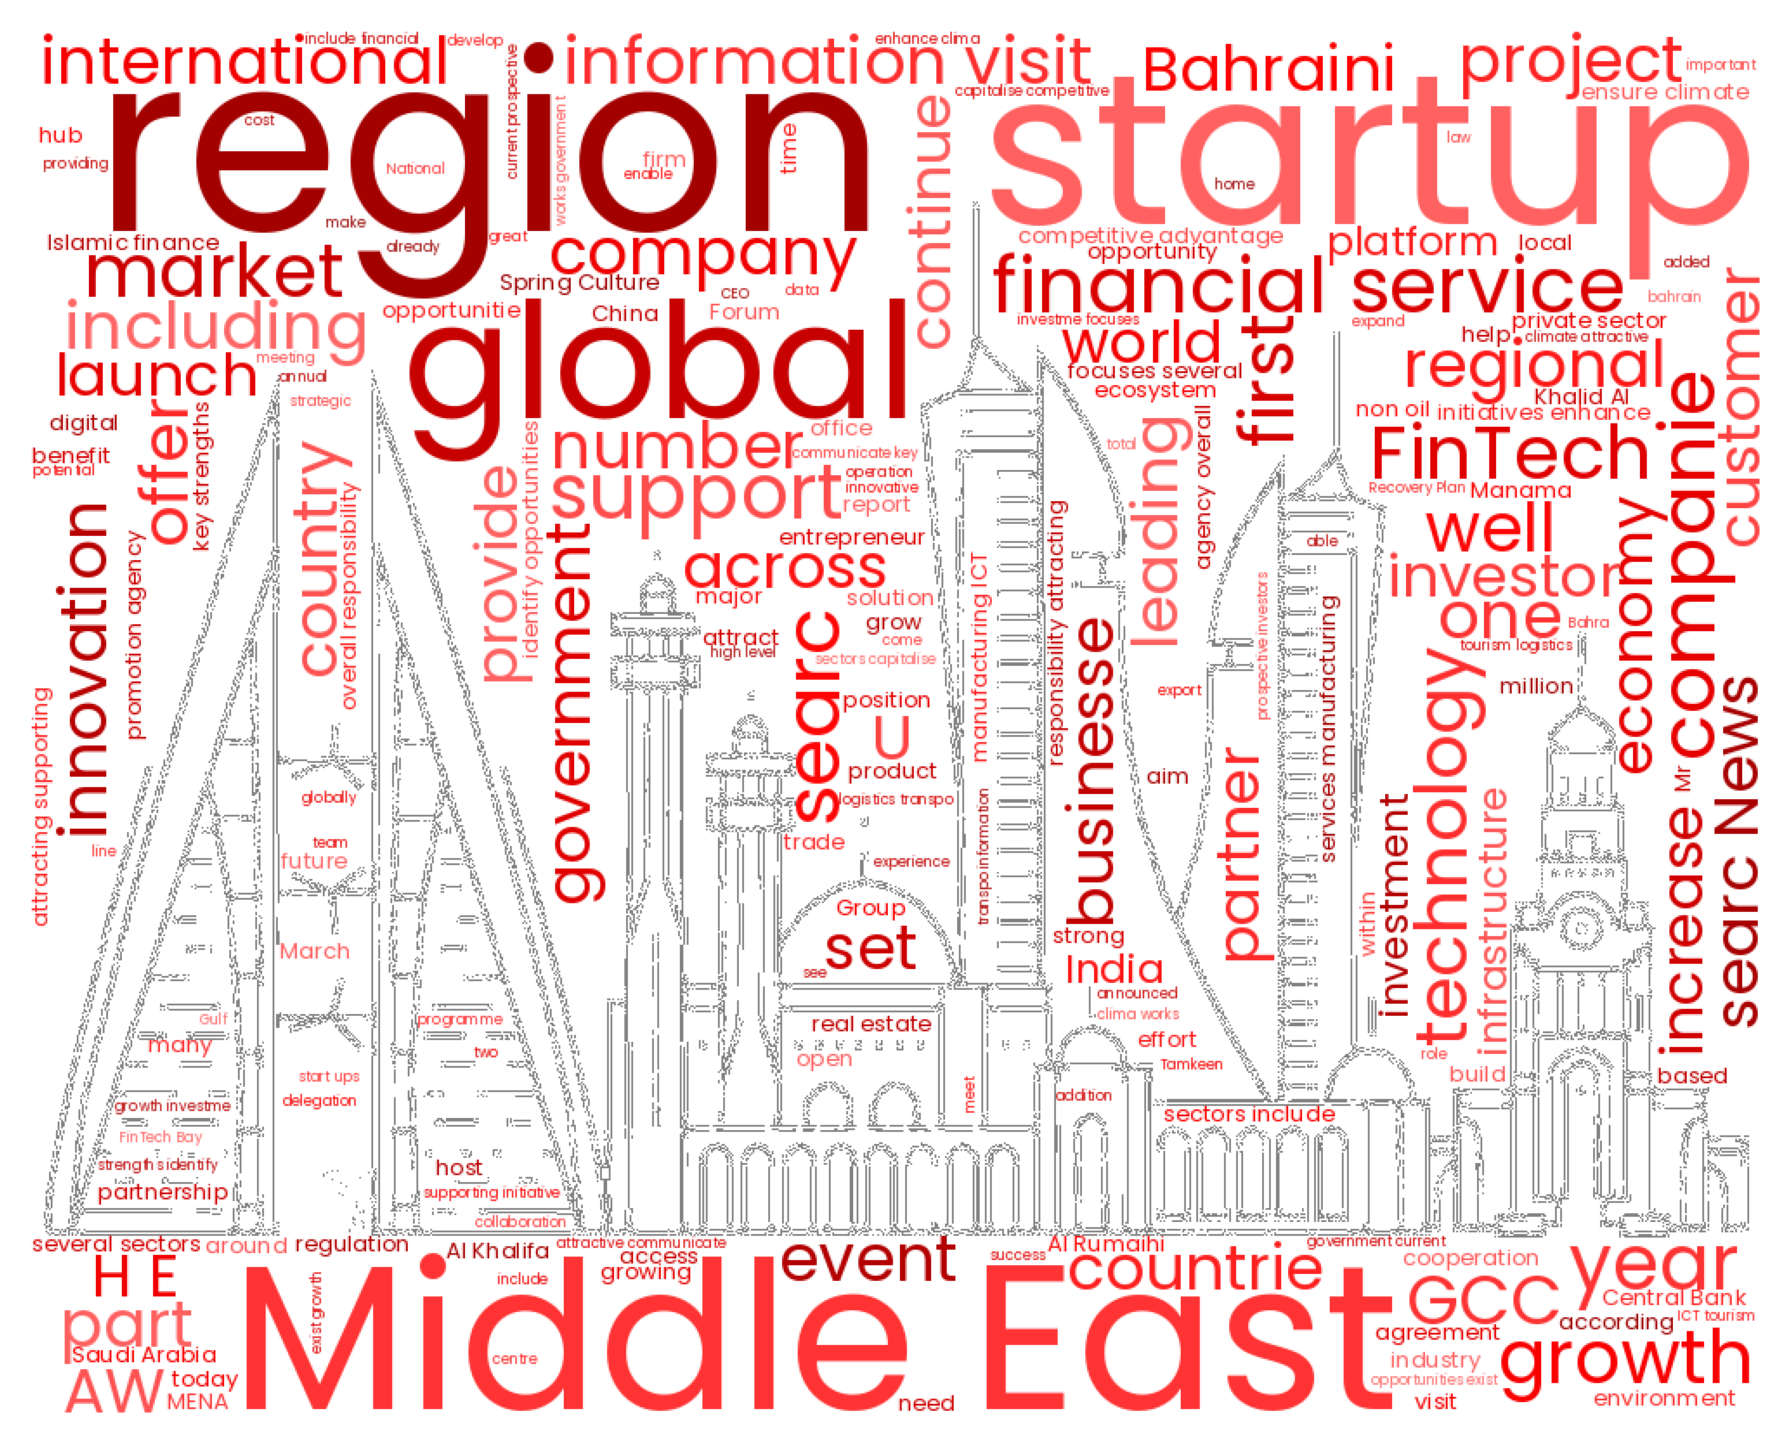

In [267]:
#I'm still working to upload the photo and font in way
#that makes you run the notebook without having the files within the notebook
#I tired to use github and google drive but its doesn't work

#coloring function
def random_red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(0, 100%, {random.randint(30, 70)}%)"

image_mask = np.array(PIL.Image.open("/content/drive/MyDrive/bahrain_skyline.jpeg"))
dont = '/content/Poppins-Regular.ttf'
wci = WordCloud(font_path= dont, mask=image_mask, background_color='white', contour_color='gray', contour_width=0.1, color_func=random_red_color).generate(output_string)
plt.figure(dpi=300)
plt.imshow(wci)
plt.axis('off')
plt.show()

# Inward Foreign Direct Investment Forecasting


---



Predicting Net inward of FDI, using the power of PyCaret library and timeseries models.

In [268]:
!pip install --pre pycaret

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3


In [269]:
!pip install --upgrade scipy

  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [270]:
import pandas as pd
from pycaret.time_series import *

In [271]:
#reading the data
data = pd.read_csv('https://raw.githubusercontent.com/HasanAbdulrazaq/DataSets/main/FDI_historical.csv')

In [272]:
data.head()

,Year,Net FDI Inflow
0,1973,3399999.9
1,1974,110000.0
2,1975,1320000.0
3,1976,3210000.0
4,1977,650000.0


In [273]:
#Renaming columns
columns = ['Date', 'Net_FDI']
data.columns = columns
#Changing the datatype to datetime data type and setting it as the index
data['Date'] = pd.to_datetime(data['Date'], format='%Y')
data.set_index('Date', drop=True, inplace=True)

In [274]:
#setup PyCaret
s = setup(data, fold=3, fh=10, session_id=123)

,Description,Value
0,session_id,123
1,Target,Net_FDI
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(49, 1)"
5,Transformed data shape,"(49, 1)"
6,Transformed train set shape,"(39, 1)"
7,Transformed test set shape,"(10, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [275]:
#check some stats for the size, nulls, mean, median, std, p-value and others.
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,49.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,574591948.27898
3,Summary,Statistics,Transformed,Median,,216986881.6
4,Summary,Statistics,Transformed,Standard Deviation,,832649490.830683
5,Summary,Statistics,Transformed,Variance,,693305174580596096.0
6,Summary,Statistics,Transformed,Kurtosis,,3.94496
7,Summary,Statistics,Transformed,Skewness,,1.901
8,Summary,Statistics,Transformed,# Distinct Values,,49.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",52.839802


In [276]:
#Original data plot
plot_model()

In [277]:
#train test split plot
plot_model(plot='train_test_split')

In [278]:
#cross validation plot
plot_model(plot='cv')

In [279]:
#Plotting some diagnostics graphs.
plot_model(plot= 'diagnostics')

In [280]:
#Comparing models and assign it to best variable, thanks to the automation power of PyCaret
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,2.2781,1.9459,440373948.7991,640664312.9239,1.2743,1.1139,-0.8536,0.0900
croston,Croston,2.3003,2.0030,454601774.9604,671890519.9426,0.7798,1.1962,-0.5207,0.0667
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,2.3482,1.9812,448713108.1344,649020980.4424,1.4079,1.1240,-0.9791,0.5500
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.3851,1.9977,448099204.1980,642138043.2055,1.5796,1.1168,-1.2266,0.8267
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,2.3873,1.9950,448304411.2341,641306567.9444,1.6295,1.1123,-1.2522,1.0800
polytrend,Polynomial Trend Forecaster,2.3913,1.9991,448846889.2397,642212883.2034,1.6045,1.1158,-1.2503,0.0433
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,2.3989,2.0029,450054502.4489,643445946.1633,1.6268,1.1176,-1.2570,0.5967
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,2.4258,2.0186,453744341.1292,647034585.7886,1.6568,1.1256,-1.2841,0.6633
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,2.4258,2.0186,453744341.1292,647034585.7886,1.6568,1.1256,-1.2841,0.4733
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,2.4258,2.0186,453744341.1292,647034585.7886,1.6568,1.1256,-1.2841,0.5933


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [281]:
#plotting the best model (Theta forecaster)
plot_model(best, plot='forecast', data_kwargs = {'fh':36})

In [282]:
#Creating ets model
ets = create_model('ets')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1981,1.2813,1.0276,182402072.1278,259673506.9191,1.2027,1.6534,-1.1024
1,1991,4.5380,3.1033,596985435.5651,691035740.2597,2.4214,1.0242,-0.3481
2,2001,2.1759,1.7178,668348244.5358,935426758.0787,0.9490,0.7287,-0.2432
Mean,NaT,2.6651,1.9496,482578584.0762,628712001.7525,1.5244,1.1354,-0.5646
SD,NaT,1.3738,0.8631,214246923.5410,279372869.5958,0.6427,0.3856,0.3827


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [283]:
#plotting the ETS model
plot_model(ets, data_kwargs = {'fh':13})